<a href="https://colab.research.google.com/github/anonimo-SBBD/SBBD/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## CNES

### Health facilities

This table has duplicated lines with the same CNES code (same facility), varing the number and type of hospital beds.  
Since our goal is to inform the facilities numbers per city, we summed the numbers of bed and groupped the facilities.

In [ ]:
es = pd.read_csv('Estabelecimentos_SUL.csv')
es

/tmp/ipykernel_12301/3003130131.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  es = pd.read_csv('Estabelecimentos_SUL.csv')


,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,ATIVIDAD,RETENCAO,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,2686805,411050,03,NaN,NaN,NaN,D,3,75699439000153,1,0,4.0,4,14.0,7.0,1.0,5,6,6.0,2.0,2,33,14,2,12,2,200901,NaN
1,2686805,411050,03,NaN,NaN,NaN,D,3,75699439000153,1,0,4.0,4,14.0,7.0,1.0,5,6,6.0,2.0,3,66,2,0,2,0,200901,NaN
2,2686805,411050,03,NaN,NaN,NaN,D,3,75699439000153,1,0,4.0,4,14.0,7.0,1.0,5,6,6.0,2.0,2,42,1,0,0,1,200901,NaN
3,2686805,411050,03,NaN,NaN,NaN,D,3,75699439000153,1,0,4.0,4,14.0,7.0,1.0,5,6,6.0,2.0,5,45,9,0,9,0,200901,NaN
4,2686805,411050,03,NaN,NaN,NaN,D,3,75699439000153,1,0,4.0,4,14.0,7.0,1.0,5,6,6.0,2.0,4,10,6,0,6,0,200901,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476791,958077,432380,18A,NaN,NaN,NaN,M,3,43239279000173,1,0,NaN,4,NaN,NaN,1.0,5,6,NaN,NaN,1,9,1,0,0,1,202212,2062.0
1476792,958077,432380,18A,NaN,NaN,NaN,M,3,43239279000173,1,0,NaN,4,NaN,NaN,1.0,5,6,NaN,NaN,1,8,1,0,0,1,202212,2062.0
1476793,958077,432380,18A,NaN,NaN,NaN,M,3,43239279000173,1,0,NaN,4,NaN,NaN,1.0,5,6,NaN,NaN,1,6,1,0,0,1,202212,2062.0
1476794,958077,432380,18A,NaN,NaN,NaN,M,3,43239279000173,1,0,NaN,4,NaN,NaN,1.0,5,6,NaN,NaN,1,3,4,0,0,4,202212,2062.0


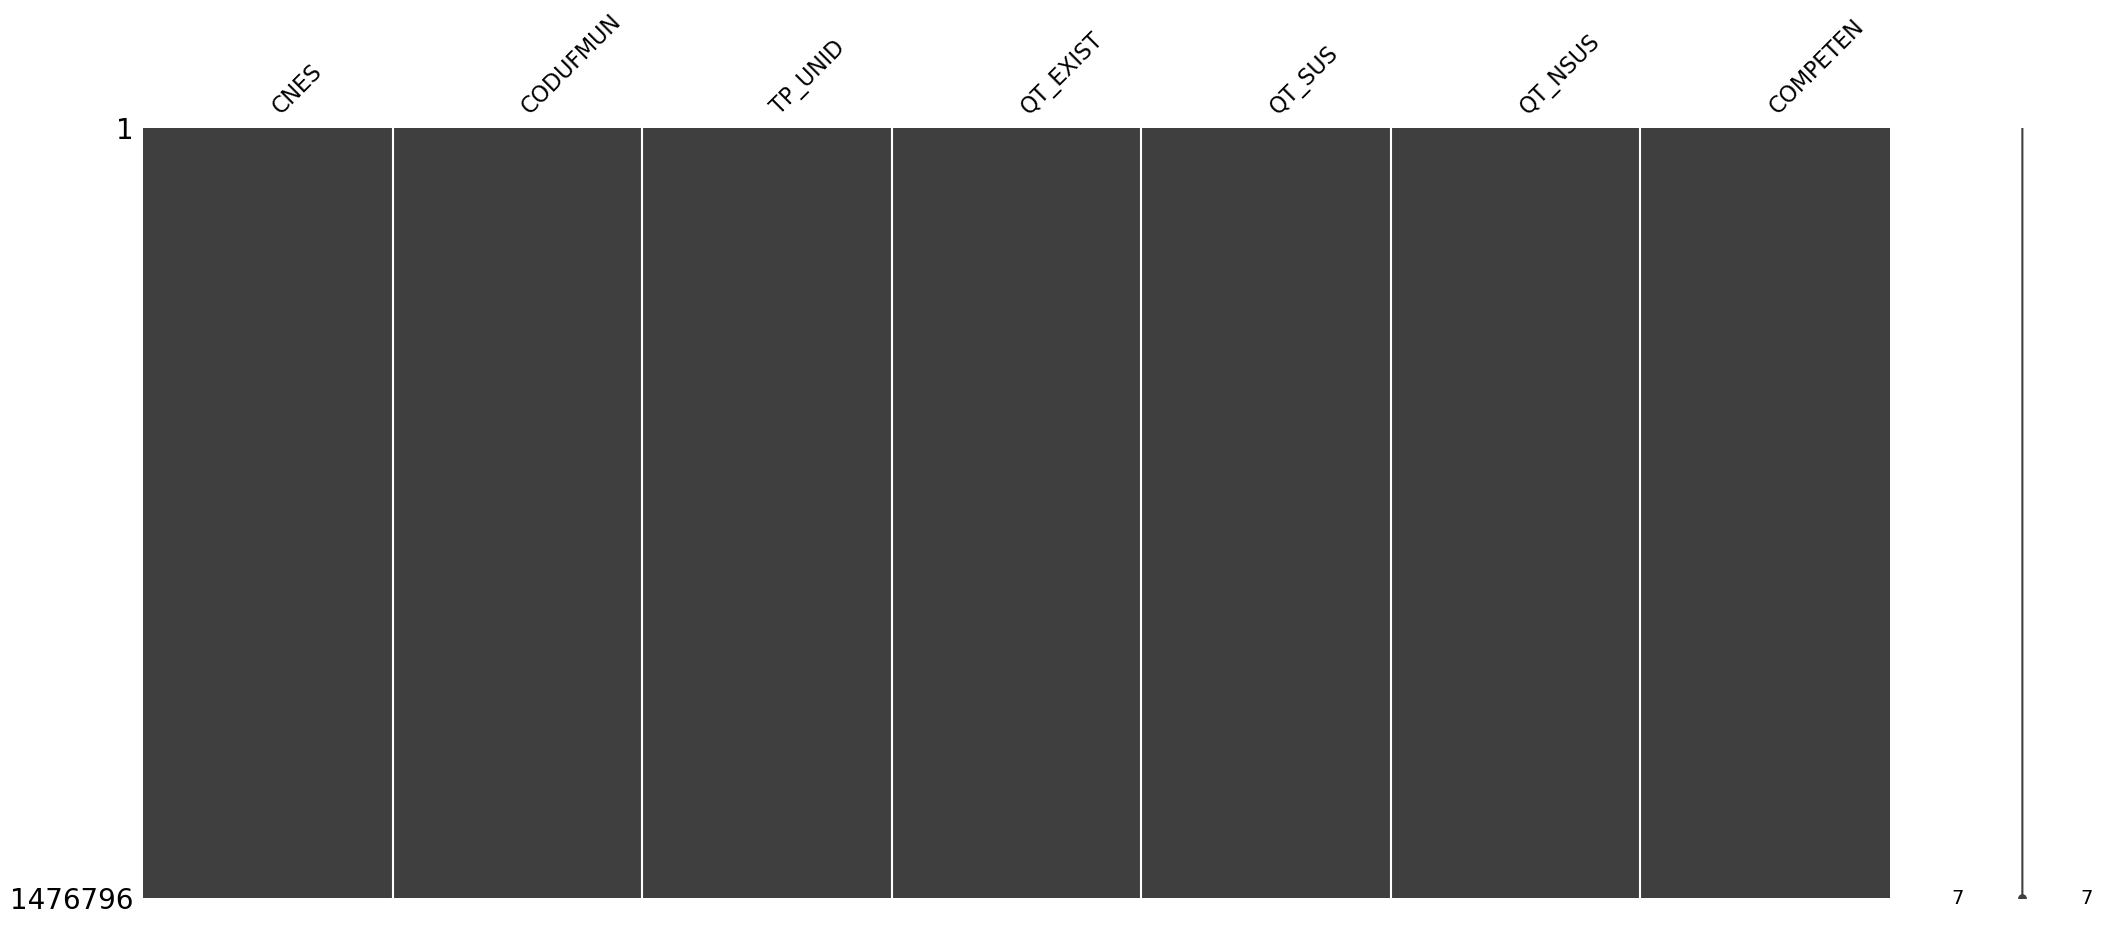

In [ ]:
msno.matrix(es);

Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

In [ ]:
es = es[es.columns[es.isnull().mean() < 0.3]]

In [ ]:
print(es.columns.tolist())

['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'TP_LEITO', 'CODLEITO', 'QT_EXIST', 'QT_CONTR', 'QT_SUS', 'QT_NSUS', 'COMPETEN', 'NAT_JUR']


In [ ]:
es = es.drop(['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 
               'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'TP_LEITO', 'QT_EXIST', 'QT_CONTR', 'CODLEITO', 'NAT_JUR'], axis= 1)

Summing number of beds regarding SUS (public) and private (a private hospital can have bed for SUS as well) and groupping the lines by the year/month and CNES code.

In [ ]:
df = es.groupby(['CNES', 'COMPETEN'], as_index=False)['QT_SUS', 'QT_NSUS'].sum()
df

/tmp/ipykernel_12301/2601556215.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = es.groupby(['CNES', 'COMPETEN'], as_index=False)['QT_SUS', 'QT_NSUS'].sum()


,CNES,COMPETEN,QT_SUS,QT_NSUS
0,13102,201609,3,0
1,13102,201610,3,0
2,13102,201611,3,0
3,13102,201612,3,0
4,13102,201701,3,0
...,...,...,...,...
200681,9977376,202208,0,1
200682,9977376,202209,0,1
200683,9977376,202210,0,1
200684,9977376,202211,0,1


Merging the dataset to include the city code and type of facility.

In [ ]:
df1 = pd.merge(es, df, on= ['CNES', 'COMPETEN'], how= 'left')
df1 = df1.drop(['QT_SUS_x', 'QT_NSUS_x'], axis=1)

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN

In [ ]:
df1 = df1.drop_duplicates(subset= ['CNES', 'COMPETEN'])
df1 = df1[df1['COMPETEN'] <= 202112].sort_values(by= ['CNES', 'CODUFMUN'])
df1

,CNES,CODUFMUN,TP_UNID,COMPETEN,QT_SUS_y,QT_NSUS_y
320899,13102,410020,15,201609,3,0
324382,13102,410020,15,201610,3,0
327856,13102,410020,15,201611,3,0
331323,13102,410020,15,201612,3,0
334778,13102,410020,15,201701,3,0
...,...,...,...,...,...,...
525773,9977376,410690,36,202108,0,1
529223,9977376,410690,36,202109,0,1
532664,9977376,410690,36,202110,0,1
536114,9977376,410690,36,202111,0,1


In [ ]:
df1.to_csv('EstabelecimentosSaude_Sul_pronto.csv', index= False)

In [ ]:
ee = pd.read_csv('EstabelecimentoEnsino_SUL.csv')
ee

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,RETENCAO,ATIVIDAD,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,COD_CEP,VINC_SUS,TP_PREST,SGRUPHAB,CMPT_INI,CMPT_FIM,DTPORTAR,PORTARIA,MAPORTAR,COMPETEN,NAT_JUR
0,13633,410400,2,NaN,NaN,NaN,D,3,7088017000191,1,0,4.0,12.0,5,7.0,3,7,6,8.0,1.0,83430000,1,60,5001,200510,201102,19/02/2009,MEMO CGH 04,200902,200901,NaN
1,2738368,410480,10,NaN,NaN,NaN,D,3,78680337000770,1,0,2.0,10.0,5,3.0,3,5,6,8.0,1.0,85804260,1,40,5001,200501,200906,05/01/2009,IM/MEC/MS-44,200901,200901,NaN
2,15245,410690,2,NaN,1.0,NaN,D,3,76575604000209,3,76575604000128,4.0,11.0,5,11.0,3,5,6,8.0,2.0,80730150,1,61,5001,200510,200906,05/01/2009,IM/MEC/MS-44,200901,200901,NaN
3,15334,410690,2,NaN,7.0,NaN,D,3,0,3,76613835000189,4.0,11.0,5,11.0,3,5,6,8.0,2.0,80010030,1,61,5001,200510,200906,05/01/2009,IM/MEC/MS-44,200901,200901,NaN
4,15369,410690,2,NaN,4.0,NaN,M,3,78350188000780,3,78350188000195,4.0,11.0,5,11.0,3,5,6,8.0,2.0,81050000,1,61,5001,200506,200906,05/01/2009,IM/MEC/MS-44,200901,200901,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,15644,410690,2,NaN,NaN,NaN,D,3,76591049000128,1,0,NaN,NaN,5,NaN,3,7,6,NaN,NaN,81520060,1,99,5001,200501,201812,30/07/2018,PT INTERMIN 2302,201807,201812,3999.0
1655,2384299,410690,2,NaN,7.0,NaN,D,3,75095679000220,3,75095679000149,NaN,NaN,5,NaN,3,5,6,NaN,NaN,80060900,1,99,5001,200408,201812,30/07/2018,PT INTERMIN 2302,201807,201812,1104.0
1656,2781859,411370,17,NaN,NaN,NaN,D,3,78640489000315,3,78640489000153,NaN,NaN,5,NaN,3,5,6,NaN,NaN,86038440,1,99,5001,200506,201812,30/07/2018,PT INTERMIN 2302,201807,201812,1112.0
1657,2587335,411520,15,NaN,NaN,NaN,D,3,0,3,79151312000156,NaN,NaN,5,NaN,3,5,6,NaN,NaN,87083170,1,99,5001,200410,201812,30/07/2018,PT INTERMIN 2302,201807,201812,1112.0


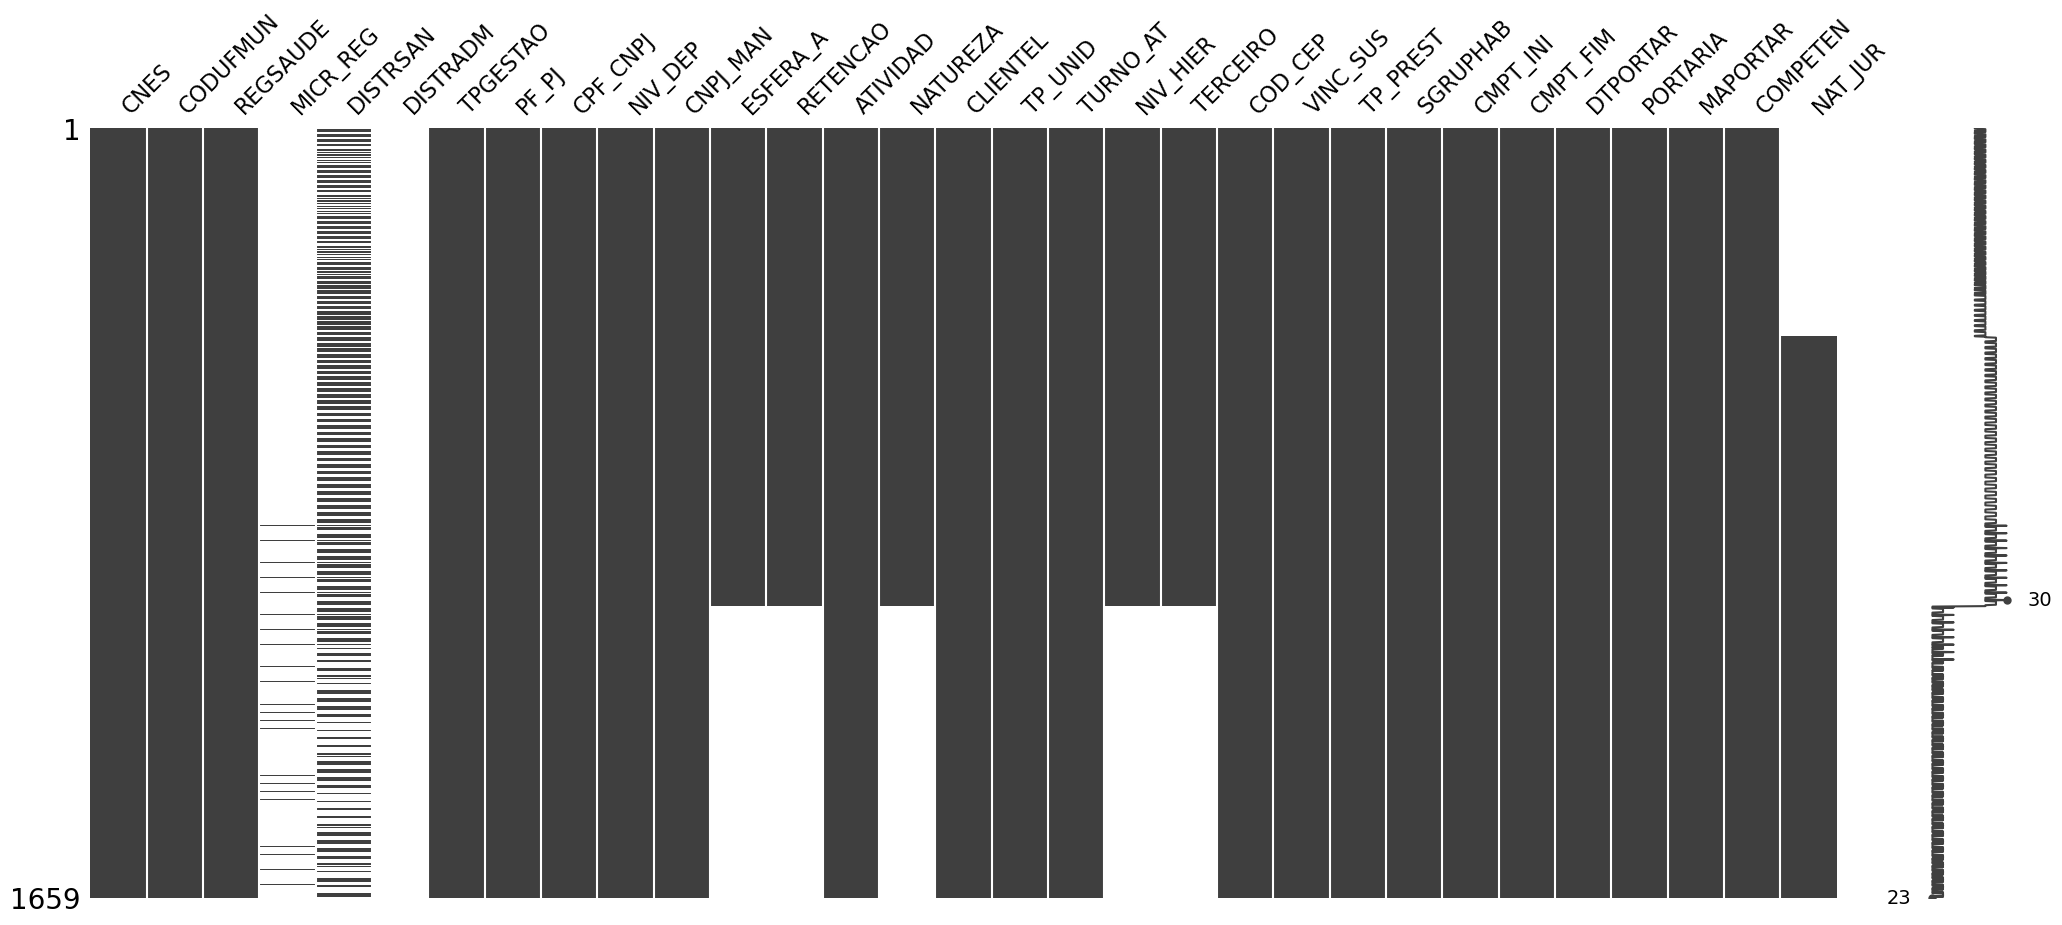

In [ ]:
msno.matrix(ee);

Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN

In [ ]:
ee = ee[ee.columns[ee.isnull().mean() < 0.3]]

In [ ]:
print(ee.columns.tolist())

['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'VINC_SUS', 'TP_PREST', 'SGRUPHAB', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR', 'PORTARIA', 'MAPORTAR', 'COMPETEN', 'NAT_JUR']


In [ ]:
df = ee.drop(['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 
              'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'TP_PREST', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR', 'PORTARIA', 'MAPORTAR', 'NAT_JUR'], axis= 1)
df

,CNES,CODUFMUN,TP_UNID,VINC_SUS,SGRUPHAB,COMPETEN
0,13633,410400,7,1,5001,200901
1,2738368,410480,5,1,5001,200901
2,15245,410690,5,1,5001,200901
3,15334,410690,5,1,5001,200901
4,15369,410690,5,1,5001,200901
...,...,...,...,...,...,...
1654,15644,410690,7,1,5001,201812
1655,2384299,410690,5,1,5001,201812
1656,2781859,411370,5,1,5001,201812
1657,2587335,411520,5,1,5001,201812


In [ ]:
len(df[df.duplicated() == False])

1659

In [ ]:
df = df[df['COMPETEN'] <= 202112]

In [ ]:
df = df.sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)
df.to_csv('EstabelecimentoEnsino_Sul_pronto.csv', index=False)

### Philantropic facilities

In [ ]:
ef = pd.read_csv('EstabelecimentoFilantropico_SUL.csv')
ef

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,RETENCAO,ATIVIDAD,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,COD_CEP,VINC_SUS,TP_PREST,SGRUPHAB,CMPT_INI,CMPT_FIM,DTPORTAR,PORTARIA,MAPORTAR,COMPETEN,NAT_JUR
0,2439360,410140,16,NaN,NaN,NaN,M,3,0,3,76578137006392,4.0,11.0,4,11.0,3,5,6,7.0,1.0,86800120,1,61,6001,200612,999999,07/12/2006,GM 3123,200612,200901,NaN
1,2576198,410150,16,NaN,NaN,NaN,D,3,75403287000108,1,0,4.0,11.0,4,11.0,3,5,6,7.0,2.0,86701120,1,61,6001,200612,999999,01/01/9000,NaN,900001,200901,NaN
2,2576341,410150,16,NaN,NaN,NaN,D,3,4169712000190,1,0,4.0,11.0,4,11.0,3,5,6,8.0,1.0,86701050,1,61,6001,200706,999999,27/06/2007,GM 1554,200706,200901,NaN
3,2753286,410180,002,NaN,NaN,NaN,D,3,76578137001757,1,0,4.0,11.0,4,11.0,3,5,6,6.0,1.0,83702070,1,61,6001,200612,999999,26/11/2007,GM 3033,200711,200901,NaN
4,2733579,410210,15,NaN,NaN,NaN,D,3,75349795000147,1,0,4.0,11.0,4,11.0,3,5,6,7.0,1.0,86730000,1,61,6001,200612,999999,07/12/2006,GM 3123,200612,200901,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27527,2228726,432190,19,NaN,NaN,NaN,D,3,98110000000149,1,0,NaN,NaN,4,NaN,1,5,6,NaN,NaN,98600000,1,99,6001,200612,999999,26/11/2007,GM 3034,200711,202212,3999.0
27528,2244225,432220,9,NaN,NaN,NaN,E,3,98314099000109,1,0,NaN,NaN,4,NaN,3,5,6,NaN,NaN,98170000,1,99,6001,200612,999999,26/11/2007,GM 3034,200711,202212,3999.0
27529,2248190,432240,10,NaN,NaN,NaN,E,3,98416225000128,1,0,NaN,NaN,3,NaN,3,5,6,NaN,NaN,97502854,1,99,6001,200612,999999,26/11/2007,GM 3034,200711,202212,3999.0
27530,2241048,432250,5ª,NaN,NaN,NaN,M,3,15415694000103,1,0,NaN,NaN,3,NaN,3,5,6,NaN,NaN,99999999,1,99,6001,200612,999999,07/12/2006,GM 3123,200612,202212,3999.0


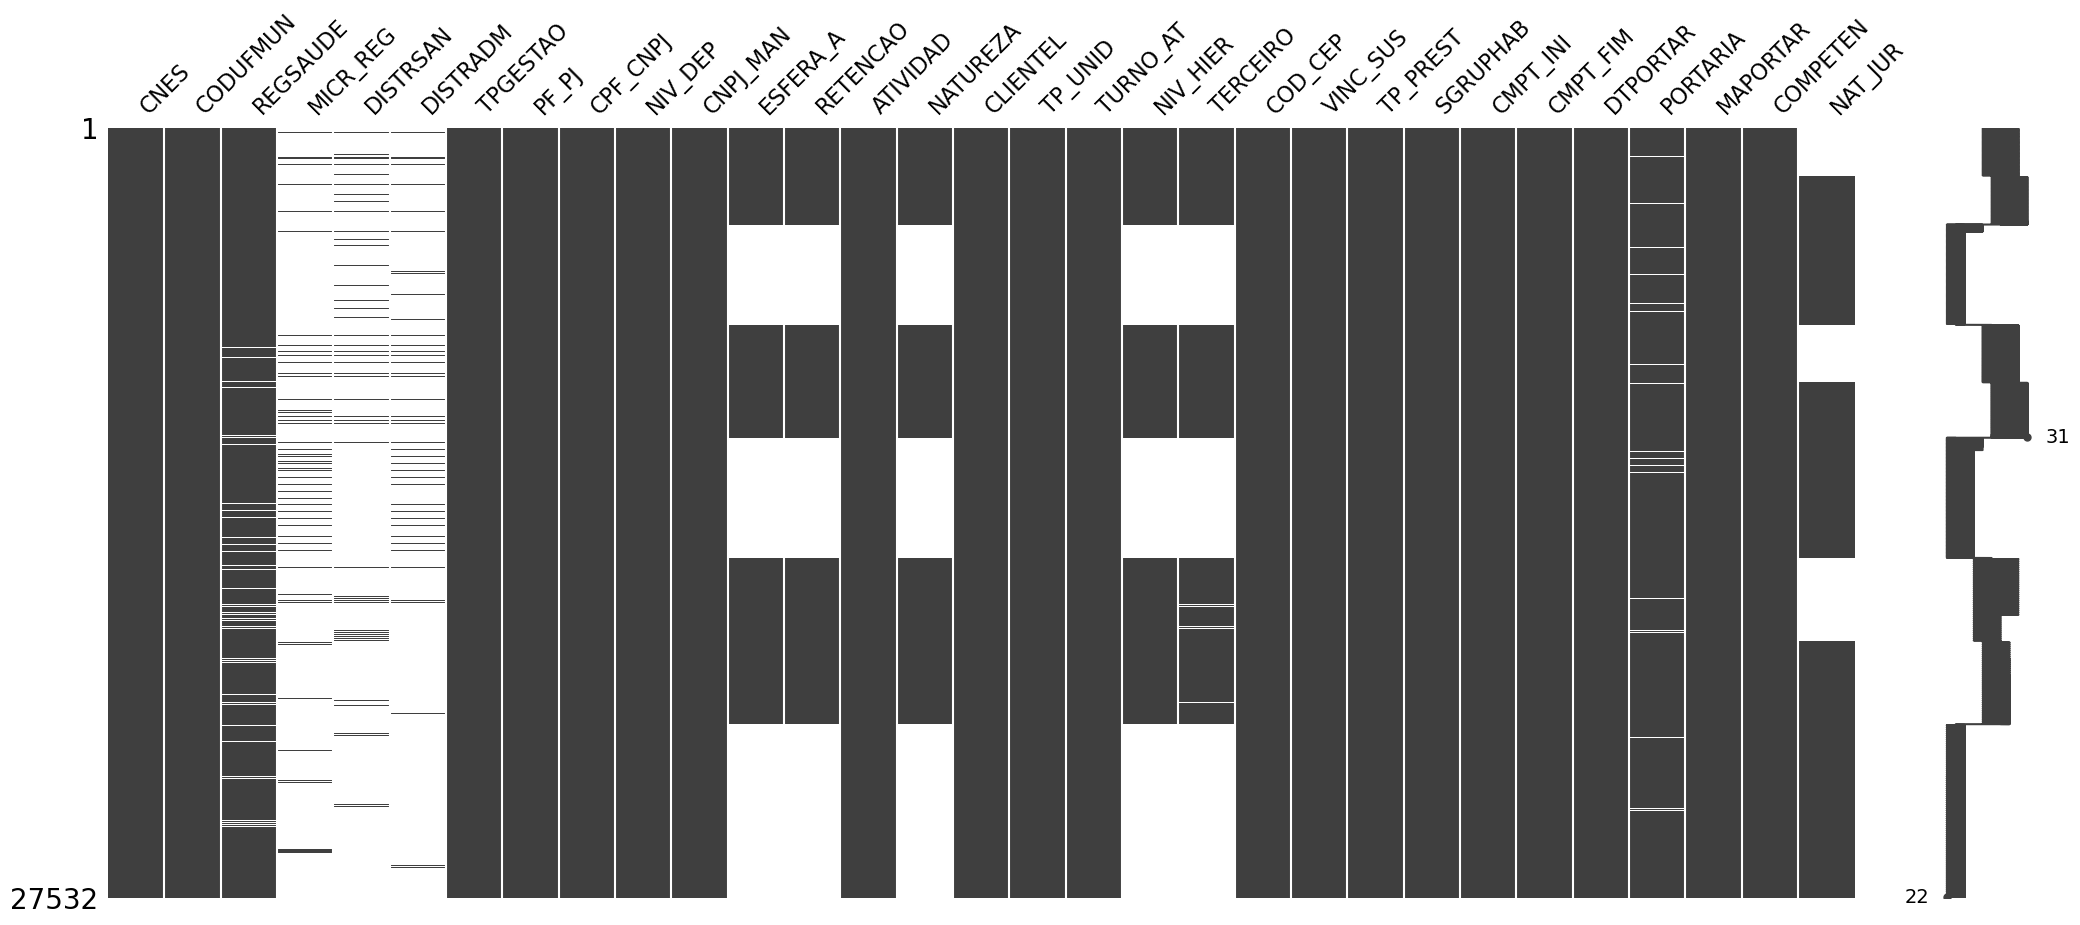

In [ ]:
msno.matrix(ef);

In [ ]:
len(ef.duplicated())

27532

Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN.

In [ ]:
ef = ef[ef.columns[ef.isnull().mean() < 0.3]]

In [ ]:
print(ef.columns.tolist())

['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'VINC_SUS', 'TP_PREST', 'SGRUPHAB', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR', 'PORTARIA', 'MAPORTAR', 'COMPETEN', 'NAT_JUR']


In [ ]:
df = ef.drop(['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 
              'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'TP_PREST', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR', 'PORTARIA', 'MAPORTAR', 'NAT_JUR'], axis= 1)
df = df.sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)

In [ ]:
df = df[df['COMPETEN'] <= 202112]

In [ ]:
df.to_csv('EstabelecimentoFilantropico_Sul_pronto.csv', index=False)

### Equipments

In [ ]:
ep = pd.read_csv('Equipamentos_SUL.csv')
ep

/tmp/ipykernel_12301/4079035236.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  ep = pd.read_csv('Equipamentos_SUL.csv')


,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,ATIVIDAD,RETENCAO,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,TIPEQUIP,CODEQUIP,QT_EXIST,QT_USO,IND_SUS,IND_NSUS,COMPETEN,NAT_JUR
0,18325,411915,02,NaN,NaN,NaN,E,1,84980249949,1,0,4,4,16,7,3.0,4,3.0,2.0,2.0,1,4,1,1,1,0,200901,NaN
1,2572117,410530,10,NaN,NaN,NaN,M,1,2442856913,1,0,4,4,16,7,1.0,22,4.0,1.0,2.0,1,7,1,1,0,1,200901,NaN
2,2737892,410540,7,NaN,NaN,NaN,M,1,11665961848,1,0,4,4,14,7,1.0,22,3.0,1.0,2.0,1,7,1,1,0,1,200901,NaN
3,2740389,410540,7,NaN,NaN,NaN,M,1,14117843087,1,0,4,4,14,7,1.0,22,3.0,1.0,2.0,2,21,1,1,0,1,200901,NaN
4,2740389,410540,7,NaN,NaN,NaN,M,1,14117843087,1,0,4,4,14,7,1.0,22,3.0,1.0,2.0,1,7,1,1,0,1,200901,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932421,2738821,412870,07,NaN,NaN,NaN,D,3,0,3,76995463000100,3,4,10,1,3.0,2,3.0,3.0,2.0,7,80,1,1,1,0,201507,1031.0
2932422,6828248,412870,7,NaN,NaN,NaN,M,3,0,3,76995463000100,3,4,10,1,1.0,2,3.0,1.0,NaN,7,80,1,1,1,0,201507,1031.0
2932423,2737426,412880,12,NaN,NaN,NaN,M,3,0,3,76247360000154,3,4,10,1,1.0,2,3.0,1.0,NaN,7,80,2,2,1,0,201507,1031.0
2932424,2739402,412880,NaN,NaN,NaN,NaN,M,3,0,3,76247360000154,3,4,10,1,1.0,1,3.0,1.0,NaN,7,80,1,1,1,0,201507,1031.0


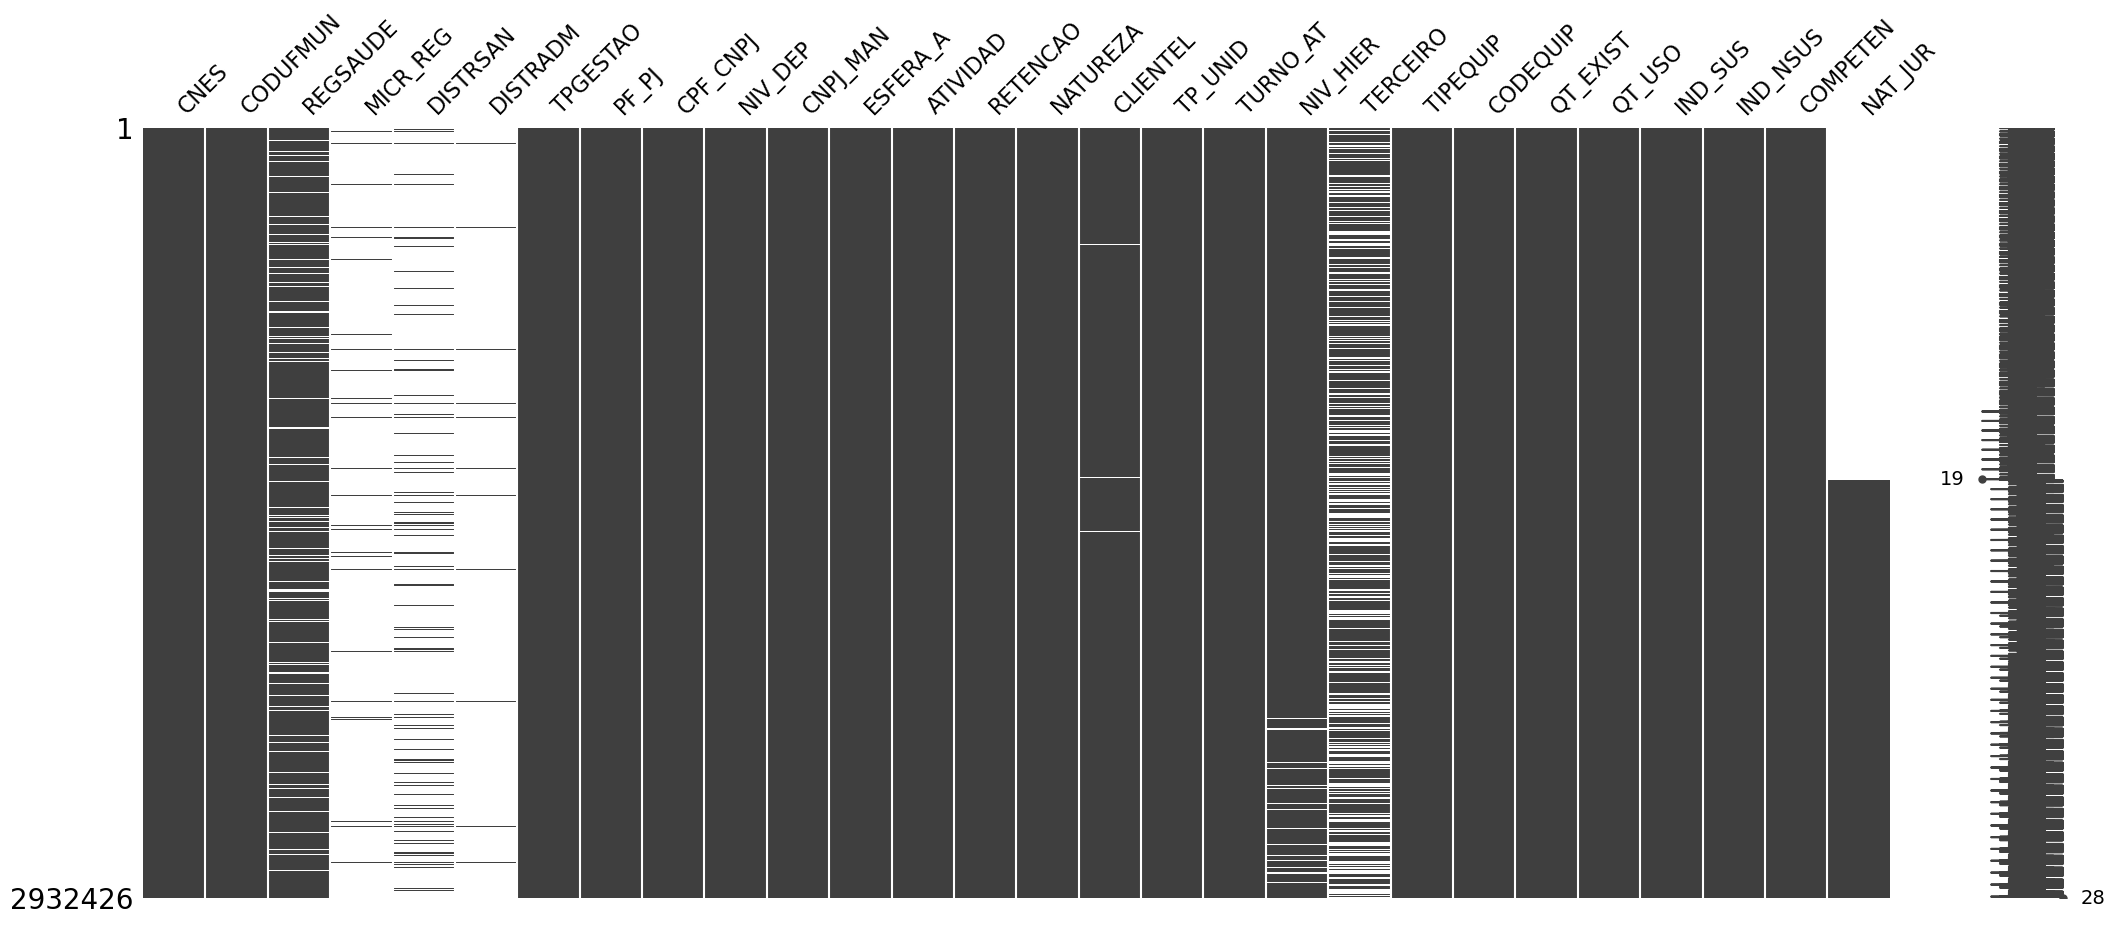

In [ ]:
msno.matrix(ep);

Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN.

In [ ]:
ep = ep[ep.columns[ep.isnull().mean() < 0.3]]

In [ ]:
len(ep['CNES'].unique())

13082

In [ ]:
print(ep.columns.tolist())

['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'TIPEQUIP', 'CODEQUIP', 'QT_EXIST', 'QT_USO', 'IND_SUS', 'IND_NSUS', 'COMPETEN', 'NAT_JUR']


In [ ]:
df = ep.drop(['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 
              'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'TIPEQUIP', 'CODEQUIP', 'QT_EXIST', 'QT_USO', 'IND_NSUS', 'NAT_JUR'], axis= 1)
df = df.sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)

In [ ]:
# df.loc[df.CNES == 2737426]
df = df[df['COMPETEN'] <= 202112]

In [ ]:
df.to_csv('Equipamentos_Sul_pronto.csv', index=False)

### Specialized services

In [ ]:
se = pd.read_csv('ServicoEspecializado_SUL.csv')
se

/tmp/ipykernel_12301/999692662.py:1: DtypeWarning: Columns (5,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  se = pd.read_csv('ServicoEspecializado_SUL.csv')


,CNES,CODUFMUN,SERV_ESP,CLASS_SR,SRVUNICO,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,ESFERA_A,ATIVIDAD,RETENCAO,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,CNPJ_MAN,CARACTER,AMB_NSUS,AMB_SUS,HOSP_NSUS,HOSP_SUS,COMPETEN,CONTSRVU,CNESTERC,NAT_JUR
0,2738643,410070,145,0,145.0,12,NaN,NaN,NaN,E,3,75085894000169,1,4.0,4,13.0,7.0,2.0,39,3,3.0,2.0,0,1,0,0,0,0,200901,1.0,NaN,NaN
1,2567326,412820,107,4,107.0,6,NaN,NaN,NaN,E,1,468649972,1,4.0,4,16.0,7.0,2.0,22,1,3.0,2.0,0,1,0,1,0,0,200901,1.0,NaN,NaN
2,2572117,410530,121,1,121.0,10,NaN,NaN,NaN,M,1,2442856913,1,4.0,4,16.0,7.0,1.0,22,4,1.0,2.0,0,1,1,0,0,0,200901,1.0,NaN,NaN
3,2572206,410530,145,0,145.0,10,NaN,NaN,NaN,D,3,4765305000145,1,4.0,4,13.0,7.0,1.0,39,3,4.0,1.0,0,1,0,0,0,0,200901,1.0,NaN,NaN
4,2572389,410820,111,1,111.0,10ª,NaN,NaN,NaN,M,3,76211192000147,1,4.0,4,15.0,13.0,1.0,22,3,1.0,1.0,0,1,0,1,0,0,200901,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947188,6432670,421985,104,4,104.0,NaN,NaN,NaN,NaN,D,3,0,3,3.0,4,10.0,1.0,NaN,68,3,NaN,NaN,1612387000108,1,0,1,0,0,201105,1.0,NaN,NaN
6947189,6432670,421985,141,1,141.0,NaN,NaN,NaN,NaN,D,3,0,3,3.0,4,10.0,1.0,NaN,68,3,NaN,NaN,1612387000108,1,0,1,0,0,201105,1.0,NaN,NaN
6947190,6432670,421985,141,2,NaN,NaN,NaN,NaN,NaN,D,3,0,3,3.0,4,10.0,1.0,NaN,68,3,NaN,NaN,1612387000108,1,0,1,0,0,201105,NaN,NaN,NaN
6947191,6480985,421985,126,4,126.0,NaN,NaN,NaN,NaN,M,3,9301991000117,1,4.0,4,14.0,7.0,1.0,36,3,2.0,2.0,0,1,1,0,0,0,201105,1.0,NaN,NaN


Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN.

In [ ]:
se = se[se.columns[se.isnull().mean() < 0.3]]

In [ ]:
print(se.columns.tolist())

['CNES', 'CODUFMUN', 'SERV_ESP', 'CLASS_SR', 'SRVUNICO', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'CNPJ_MAN', 'CARACTER', 'AMB_NSUS', 'AMB_SUS', 'HOSP_NSUS', 'HOSP_SUS', 'COMPETEN', 'CONTSRVU', 'CNESTERC', 'NAT_JUR']


In [ ]:
se = se.drop(['CLASS_SR', 'SRVUNICO', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'ESFERA_A', 'ATIVIDAD', 'RETENCAO', 'NATUREZA', 
              'CLIENTEL', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'CNPJ_MAN', 'CARACTER', 'AMB_NSUS', 'HOSP_NSUS', 'CONTSRVU', 'CNESTERC', 'NAT_JUR'], axis=1)
se = se.sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)

In [ ]:
se = se[se.COMPETEN <= 202112].sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)

In [ ]:
se.to_csv('ServicoEspecializado_Sul_pronto.csv', index=False)

### Teams

In [ ]:
eq = pd.read_csv('Equipes_SUL.csv')
eq

/tmp/ipykernel_13579/1300962954.py:1: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  eq = pd.read_csv('Equipes_SUL.csv')


,CNES,CODUFMUN,COD_CEP,CPF_CNPJ,PF_PJ,NIV_DEP,CNPJ_MAN,COD_IR,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,VINC_SUS,TPGESTAO,ESFERA_A,RETENCAO,ATIVIDAD,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,TP_PREST,GESPRG1E,GESPRG1M,GESPRG2E,GESPRG2M,GESPRG4E,GESPRG4M,NIVATE_A,GESPRG3E,GESPRG3M,GESPRG5E,GESPRG5M,GESPRG6E,GESPRG6M,NIVATE_H,AP01CV01,AP01CV02,AP01CV05,AP01CV06,AP01CV03,AP01CV04,AP02CV01,AP02CV02,AP02CV05,AP02CV06,AP02CV03,AP02CV04,AP03CV01,AP03CV02,AP03CV05,AP03CV06,AP03CV03,AP03CV04,AP04CV01,AP04CV02,AP04CV05,AP04CV06,AP04CV03,AP04CV04,AP05CV01,AP05CV02,AP05CV05,AP05CV06,AP05CV03,AP05CV04,AP06CV01,AP06CV02,AP06CV05,AP06CV06,AP06CV03,AP06CV04,AP07CV01,AP07CV02,AP07CV05,AP07CV06,AP07CV03,AP07CV04,ATEND_PR,IDEQUIPE,TIPO_EQP,NOME_EQP,ID_AREA,NOMEAREA,ID_SEGM,DESCSEGM,TIPOSEGM,DT_ATIVA,DT_DESAT,QUILOMBO,ASSENTAD,POPGERAL,ESCOLA,INDIGENA,PRONASCI,MOTDESAT,TP_DESAT,COMPETEN,NAT_JUR,AP01CV07,AP02CV07,AP03CV07,AP04CV07,AP05CV07,AP06CV07,AP07CV07
0,2576732,410010,86460000,0,3,3,75743567000157,10.0,18,NaN,NaN,NaN,1,D,3.0,10.0,4,1.0,1.0,2,3,2.0,2.0,50,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,410010000200000002,1,CENTRO DE SAUDE DE ABATIA 2,4100100002,CENTRO DE SAUDE DE ABATIA 2,41001002,ZONA RURAL,2,200003,900001,0,0,1,0,0,0,0,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2576732,410010,86460000,0,3,3,75743567000157,10.0,18,NaN,NaN,NaN,1,D,3.0,10.0,4,1.0,1.0,2,3,2.0,2.0,50,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,410010000100000001,3,CENTRO DE SAUDE DE ABATIA 1,4100100001,CENTRO DE SAUDE DE ABATIA 1,41001001,ZONA URBANA,1,200003,900001,0,0,1,0,0,0,0,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13102,410020,83490000,0,3,3,76105642000117,10.0,2,410020,NaN,NaN,1,D,3.0,10.0,4,1.0,1.0,2,6,3.0,2.0,50,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,410020000100000001,2,CENTRO DE SAUDE ADRIANOPOLIS,4100200001,CENTRO DE SAUDE ADRIANOPOLIS,41002001,CENTRO DE SAUDE ADRIANOPOLIS,1,200205,900001,0,0,1,0,0,0,0,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13110,410020,83490000,0,3,3,76105642000117,10.0,02,NaN,NaN,NaN,1,M,3.0,10.0,4,1.0,1.0,1,3,1.0,2.0,50,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,410020000300000003,2,COLONIA SETE BARRAS,4100200003,COLONIA SETE BARRAS,41002003,COLONIA SETE BARRAS,2,200603,900001,0,0,1,0,0,0,0,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21857,410020,83490000,0,3,3,76105642000117,10.0,2,NaN,NaN,NaN,1,M,3.0,10.0,4,1.0,1.0,1,3,1.0,2.0,50,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,410020000200000002,2,VILA MOTA,4100200002,VILA MOTA,41002002,POSTO DE SAUDE VILA MOTA,2,200603,900001,0,0,1,0,0,0,0,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342943,2224372,432380,95588000,0,3,3,94436474000124,NaN,18ª,NaN,NaN,NaN,1,M,NaN,NaN,4,NaN,1.0,2,3,NaN,NaN,99,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,432380000102053330,71,ESB GUARA,4323800001,POSTO DE SAUDE DO CENTRO,43238001,POSTO DE SAUDE DO CENTRO,1,202007,900001,0,0,0,0,0,0,0,0,202212,1244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1342944,5377099,432380,95588000,0,3,3,94436474000124,NaN,18ª,OSORIO,NaN,NaN,1,M,NaN,NaN,4,NaN,1.0,2,3,NaN,NaN,99,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4323

Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN.

In [ ]:
eq = eq[eq.columns[eq.isnull().mean() < 0.3]]

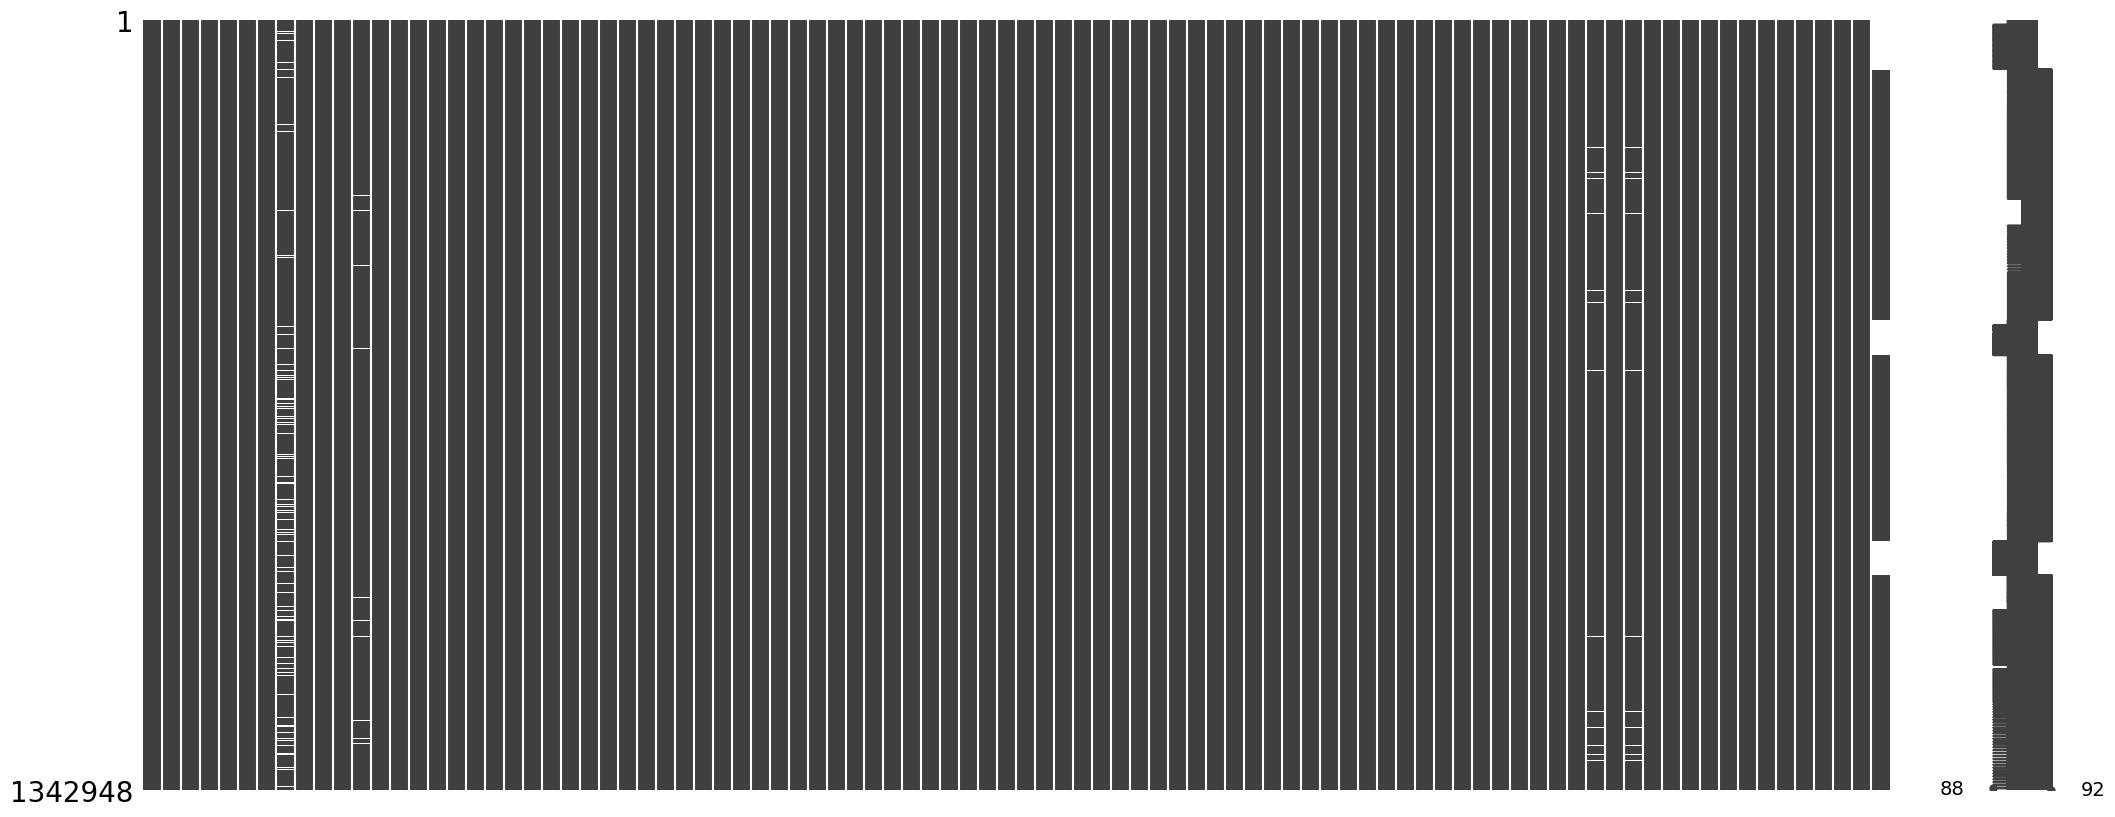

In [ ]:
msno.matrix(eq);

In [ ]:
# len(eq.CNES.unique())
# eq.loc[eq.CNES == 13110]

In [ ]:
print(eq.columns.tolist())

['CNES', 'CODUFMUN', 'COD_CEP', 'CPF_CNPJ', 'PF_PJ', 'NIV_DEP', 'CNPJ_MAN', 'COD_IR', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'VINC_SUS', 'TPGESTAO', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'TP_PREST', 'GESPRG1E', 'GESPRG1M', 'GESPRG2E', 'GESPRG2M', 'GESPRG4E', 'GESPRG4M', 'NIVATE_A', 'GESPRG3E', 'GESPRG3M', 'GESPRG5E', 'GESPRG5M', 'GESPRG6E', 'GESPRG6M', 'NIVATE_H', 'AP01CV01', 'AP01CV02', 'AP01CV05', 'AP01CV06', 'AP01CV03', 'AP01CV04', 'AP02CV01', 'AP02CV02', 'AP02CV05', 'AP02CV06', 'AP02CV03', 'AP02CV04', 'AP03CV01', 'AP03CV02', 'AP03CV05', 'AP03CV06', 'AP03CV03', 'AP03CV04', 'AP04CV01', 'AP04CV02', 'AP04CV05', 'AP04CV06', 'AP04CV03', 'AP04CV04', 'AP05CV01', 'AP05CV02', 'AP05CV05', 'AP05CV06', 'AP05CV03', 'AP05CV04', 'AP06CV01', 'AP06CV02', 'AP06CV05', 'AP06CV06', 'AP06CV03', 'AP06CV04', 'AP07CV01', 'AP07CV02', 'AP07CV05', 'AP07CV06', 'AP07CV03', 'AP07CV04', 'ATEND_PR', 'IDEQUIPE', 'TIPO_EQP', 'NOME_EQP', 'ID

In [ ]:
df = eq.drop(['CPF_CNPJ', 'PF_PJ', 'NIV_DEP', 'CNPJ_MAN', 'COD_IR', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 
              'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'TP_PREST', 'GESPRG1E', 'GESPRG1M', 'GESPRG2E', 'GESPRG2M', 'GESPRG4E', 'GESPRG4M', 'NIVATE_A', 'GESPRG3E', 'GESPRG3M', 'GESPRG5E', 
              'GESPRG5M', 'GESPRG6E', 'GESPRG6M', 'NIVATE_H', 'AP01CV01', 'AP01CV02', 'AP01CV05', 'AP01CV06', 'AP01CV03', 'AP01CV04', 'AP02CV01', 'AP02CV02', 'AP02CV05', 'AP02CV06', 
              'AP02CV03', 'AP02CV04', 'AP03CV01', 'AP03CV02', 'AP03CV05', 'AP03CV06', 'AP03CV03', 'AP03CV04', 'AP04CV01', 'AP04CV02', 'AP04CV05', 'AP04CV06', 'AP04CV03', 'AP04CV04', 
              'AP05CV01', 'AP05CV02', 'AP05CV05', 'AP05CV06', 'AP05CV03', 'AP05CV04', 'AP06CV01', 'AP06CV02', 'AP06CV05', 'AP06CV06', 'AP06CV03', 'AP06CV04', 'AP07CV01', 'AP07CV02', 
              'AP07CV05', 'AP07CV06', 'AP07CV03', 'AP07CV04', 'ATEND_PR', 'IDEQUIPE', 'TIPO_EQP', 'NOME_EQP', 'ID_AREA', 'NOMEAREA', 'ID_SEGM', 'DESCSEGM', 'TIPOSEGM', 'DT_ATIVA', 
              'DT_DESAT', 'QUILOMBO', 'ASSENTAD', 'POPGERAL', 'ESCOLA', 'INDIGENA', 'PRONASCI', 'MOTDESAT', 'TP_DESAT', 'NAT_JUR', 'AP01CV07', 'AP02CV07', 'AP03CV07', 
              'AP04CV07', 'AP05CV07', 'AP06CV07', 'AP07CV07'],
             axis= 1)

In [ ]:
df = df[df.COMPETEN <= 202112]
df = df.sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)
df

,CNES,CODUFMUN,COD_CEP,VINC_SUS,TP_UNID,COMPETEN
0,13102,410020,83490000,1,2,200901
1,13102,410020,83490000,1,2,200902
2,13102,410020,83490000,1,2,200903
3,13102,410020,83490000,1,2,200904
4,13102,410020,83490000,1,2,200905
...,...,...,...,...,...,...
1162463,9999493,410765,83823269,1,2,202108
1162464,9999493,410765,83823269,1,2,202109
1162465,9999493,410765,83823269,1,2,202110
1162466,9999493,410765,83823269,1,2,202111


In [ ]:
df.to_csv('Equipes_Sul_pronto.csv', index= False)

### Habilitations

In [ ]:
hb = pd.read_csv('Habilitacao_SUL.csv')
hb

/tmp/ipykernel_13579/1068393546.py:1: DtypeWarning: Columns (3,4,24) have mixed types. Specify dtype option on import or set low_memory=False.
  hb = pd.read_csv('Habilitacao_SUL.csv')


,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,RETENCAO,ATIVIDAD,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,COD_CEP,VINC_SUS,TP_PREST,SGRUPHAB,CMPT_INI,CMPT_FIM,DTPORTAR,PORTARIA,MAPORTAR,NULEITOS,COMPETEN,NAT_JUR
0,2733706,410550,13ª,NaN,NaN,NaN,E,3,80616337000167,1,0,4.0,14.0,4,7.0,3.0,36,3,4.0,2.0,87200000,1,20,1503,200210,999999,21/10/2002,773-SAS/MS,200210,0,200901,NaN
1,6002919,410040,02,NaN,NaN,NaN,E,3,0,3,76105659000174,3.0,10.0,4,1.0,3.0,70,3,4.0,NaN,83512000,1,50,617,200812,999999,22/12/2008,PT SAS 740,200812,0,200901,NaN
2,2582554,410110,18,NaN,NaN,NaN,D,3,78038114000118,1,0,4.0,11.0,4,11.0,3.0,5,6,6.0,2.0,86380000,1,61,1101,199612,999999,01/01/9000,NaN,900001,0,200901,NaN
3,3952207,410110,18,NaN,NaN,NaN,E,3,0,3,76235761000194,3.0,10.0,4,1.0,3.0,70,3,4.0,NaN,86380000,1,50,616,200708,999999,31/08/2007,SAS 490,200708,0,200901,NaN
4,5466164,410110,18,NaN,NaN,NaN,M,3,0,3,76235761000194,3.0,10.0,4,1.0,3.0,36,3,4.0,NaN,86380000,1,50,402,200707,999999,12/02/2008,GM 225,200802,0,200901,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656772,5223962,432300,001,NaN,NaN,NaN,D,3,92898550000511,1,0,NaN,NaN,4,NaN,3.0,5,6,NaN,NaN,94410250,1,99,2601,200704,999999,06/12/2022,4242/GM/MS,202212,15,202212,3069.0
656773,5223962,432300,001,NaN,NaN,NaN,D,3,92898550000511,1,0,NaN,NaN,4,NaN,3.0,5,6,NaN,NaN,94410250,1,99,2420,201508,999999,26/08/2015,SAS 772,201508,0,202212,3069.0
656774,5223962,432300,001,NaN,NaN,NaN,D,3,92898550000511,1,0,NaN,NaN,4,NaN,3.0,5,6,NaN,NaN,94410250,1,99,2407,201710,202307,11/07/2019,PT SAES 835,201907,0,202212,3069.0
656775,7052278,432300,2,10,NaN,NaN,M,3,0,3,88000914000101,NaN,NaN,4,NaN,3.0,70,3,NaN,NaN,94410480,1,99,620,201612,999999,23/12/2016,SAS 2322,201612,0,202212,1244.0


Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN.

In [ ]:
hb = hb[hb.columns[hb.isnull().mean() < 0.3]]

In [ ]:
print(hb.columns.tolist())

['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'VINC_SUS', 'TP_PREST', 'SGRUPHAB', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR', 'PORTARIA', 'MAPORTAR', 'NULEITOS', 'COMPETEN', 'NAT_JUR']


In [ ]:
hb = hb.drop(['REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL',
              'TURNO_AT', 'NIV_HIER', 'TERCEIRO', 'COD_CEP', 'TP_PREST', 'CMPT_INI', 'CMPT_FIM', 'DTPORTAR', 'PORTARIA', 'MAPORTAR', 'NAT_JUR'], axis= 1)
hb = hb[hb.COMPETEN <= 202112]
hb = hb.sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)

In [ ]:
hb.to_csv('Habilitacoes_Sul_pronto.csv', index= False)

### Complemental data

In [ ]:
dc = pd.read_csv('DadosComplementares_SUL.csv')
dc

/tmp/ipykernel_13579/879632280.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dc = pd.read_csv('DadosComplementares_SUL.csv')


,CNES,CODUFMUN,CPF_CNPJ,PF_PJ,NIV_DEP,CNPJ_MAN,COD_IR,REGSAUDE,MICR_REG,DISTRSAN,VINC_SUS,DISTRADM,TPGESTAO,ESFERA_A,RETENCAO,ATIVIDAD,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TP_PREST,S_HBSAGP,S_HBSAGN,S_DPI,S_DPAC,S_REAGP,S_REAGN,S_REHCV,MAQ_PROP,MAQ_OUTR,F_AREIA,F_CARVAO,ABRANDAD,DEIONIZA,OSMOSE_R,OUT_TRAT,CNS_NEFR,DIALISE,SIMUL_RD,PLANJ_RD,ARMAZ_FT,CONF_MAS,SALA_MOL,BLOCOPER,S_ARMAZE,S_PREPAR,S_QCDURA,S_QLDURA,S_CPFLUX,S_SIMULA,S_ACELL6,S_ALSEME,S_ALCOME,ORTV1050,ORV50150,OV150500,UN_COBAL,EQBRBAIX,EQBRMEDI,EQBRALTA,EQ_MAREA,EQ_MINDI,EQSISPLN,EQDOSCLI,EQFONSEL,CNS_ADM,CNS_OPED,CNS_CONC,CNS_OCLIN,CNS_MRAD,CNS_FNUC,QUIMRADI,S_RECEPC,S_TRIHMT,S_TRICLI,S_COLETA,S_AFERES,S_PREEST,S_PROCES,S_ESTOQU,S_DISTRI,S_SOROLO,S_IMUNOH,S_PRETRA,S_HEMOST,S_CONTRQ,S_BIOMOL,S_IMUNFE,S_TRANSF,S_SGDOAD,QT_CADRE,QT_CENRE,QT_REFSA,QT_CONRA,QT_EXTPL,QT_FRE18,QT_FRE30,QT_AGIPL,QT_SELAD,QT_IRRHE,QT_AGLTN,QT_MAQAF,QT_REFRE,QT_REFAS,QT_CAPFL,CNS_HMTR,CNS_HMTL,CNS_CRES,CNS_RTEC,HEMOTERA,AP01CV01,AP01CV02,AP01CV05,AP01CV06,AP01CV03,AP01CV04,AP02CV01,AP02CV02,AP02CV05,AP02CV06,AP02CV03,AP02CV04,AP03CV01,AP03CV02,AP03CV05,AP03CV06,AP03CV03,AP03CV04,AP04CV01,AP04CV02,AP04CV05,AP04CV06,AP04CV03,AP04CV04,AP05CV01,AP05CV02,AP05CV05,AP05CV06,AP05CV03,AP05CV04,AP06CV01,AP06CV02,AP06CV05,AP06CV06,AP06CV03,AP06CV04,AP07CV01,AP07CV02,AP07CV05,AP07CV06,AP07CV03,AP07CV04,ATEND_PR,GESPRG3E,GESPRG3M,GESPRG4E,GESPRG4M,GESPRG6E,GESPRG6M,NIVATE_A,NIVATE_H,COMPETEN,NAT_JUR,AP01CV07,AP02CV07,AP03CV07,AP04CV07,AP05CV07,AP06CV07,AP07CV07
0,2733706,410550,80616337000167,3,1,0,NaN,13ª,NaN,NaN,1,NaN,E,4.0,14.0,4,7.0,3.0,36,3,4.0,20,1,1,0,0,1,1,1,5,5,0,0,0,0,0,0,2.015652e+14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2733528,410045,0,3,3,78069143000147,10.0,11,NaN,NaN,1,NaN,M,3.0,10.0,4,1.0,3.0,5,6,6.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.207328e+14,1.207328e+14,1.207328e+14,1.207328e+14,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2416700,410140,0,3,3,76416866000140,10.0,16,NaN,NaN,1,NaN,E,2.0,10.0,4,1.0,2.0,39,6,4.0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2,1,2,1,0,1,1,1,1,1,1,1,0,0,0,0,1,2,9,3,7,5,1,3,0,2,4,0,2,0,4,2,1,2.015681e+14,NaN,2.015681e+14,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2439263,410140,0,3,3,76578137006392,11.0,16,NaN,NaN,1,NaN,M,4.0,14.0,4,11.0,3.0,5,6,6.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,27,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,1.252213e+14,2.036810e+14,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2439360,410140,0,3,3,76578137006392,11.0,16,NaN,NaN,1,NaN,M,4.0,11.0,4,11.0,3.0,5,6,7.0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,54,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,1.252213e+14,2.036810e+14,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,200901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN.

In [ ]:
dc[dc.columns[dc.isnull().mean() < 0.3]]
dc = dc.sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)

In [ ]:
print(dc.columns.tolist())

['CNES', 'CODUFMUN', 'CPF_CNPJ', 'PF_PJ', 'NIV_DEP', 'CNPJ_MAN', 'COD_IR', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'VINC_SUS', 'DISTRADM', 'TPGESTAO', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT', 'NIV_HIER', 'TP_PREST', 'S_HBSAGP', 'S_HBSAGN', 'S_DPI', 'S_DPAC', 'S_REAGP', 'S_REAGN', 'S_REHCV', 'MAQ_PROP', 'MAQ_OUTR', 'F_AREIA', 'F_CARVAO', 'ABRANDAD', 'DEIONIZA', 'OSMOSE_R', 'OUT_TRAT', 'CNS_NEFR', 'DIALISE', 'SIMUL_RD', 'PLANJ_RD', 'ARMAZ_FT', 'CONF_MAS', 'SALA_MOL', 'BLOCOPER', 'S_ARMAZE', 'S_PREPAR', 'S_QCDURA', 'S_QLDURA', 'S_CPFLUX', 'S_SIMULA', 'S_ACELL6', 'S_ALSEME', 'S_ALCOME', 'ORTV1050', 'ORV50150', 'OV150500', 'UN_COBAL', 'EQBRBAIX', 'EQBRMEDI', 'EQBRALTA', 'EQ_MAREA', 'EQ_MINDI', 'EQSISPLN', 'EQDOSCLI', 'EQFONSEL', 'CNS_ADM', 'CNS_OPED', 'CNS_CONC', 'CNS_OCLIN', 'CNS_MRAD', 'CNS_FNUC', 'QUIMRADI', 'S_RECEPC', 'S_TRIHMT', 'S_TRICLI', 'S_COLETA', 'S_AFERES', 'S_PREEST', 'S_PROCES', 'S_ESTOQU', 'S_DISTRI', 'S_SOROLO', 'S_IMUNOH', 'S_PRETRA', 

In [ ]:
dc = dc.drop(['CPF_CNPJ', 'PF_PJ', 'NIV_DEP', 'CNPJ_MAN', 'COD_IR', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM', 'TPGESTAO', 'ESFERA_A', 'RETENCAO', 'ATIVIDAD', 'NATUREZA',
              'CLIENTEL', 'TURNO_AT', 'NIV_HIER', 'TP_PREST', 'S_HBSAGP', 'S_HBSAGN', 'S_DPI', 'S_DPAC', 'S_REAGP', 'S_REAGN', 'S_REHCV', 'MAQ_PROP', 'MAQ_OUTR', 'F_AREIA', 
              'F_CARVAO', 'ABRANDAD', 'DEIONIZA', 'OSMOSE_R', 'OUT_TRAT', 'CNS_NEFR', 'DIALISE', 'SIMUL_RD', 'PLANJ_RD', 'ARMAZ_FT', 'CONF_MAS', 'SALA_MOL', 'BLOCOPER', 
              'S_ARMAZE', 'S_PREPAR', 'S_QCDURA', 'S_QLDURA', 'S_CPFLUX', 'S_SIMULA', 'S_ACELL6', 'S_ALSEME', 'S_ALCOME', 'ORTV1050', 'ORV50150', 'OV150500', 'UN_COBAL', 
              'EQBRBAIX', 'EQBRMEDI', 'EQBRALTA', 'EQ_MAREA', 'EQ_MINDI', 'EQSISPLN', 'EQDOSCLI', 'EQFONSEL', 'CNS_ADM', 'CNS_OPED', 'CNS_CONC', 'CNS_OCLIN', 'CNS_MRAD', 
              'CNS_FNUC', 'QUIMRADI', 'S_RECEPC', 'S_TRIHMT', 'S_TRICLI', 'S_COLETA', 'S_AFERES', 'S_PREEST', 'S_PROCES', 'S_ESTOQU', 'S_DISTRI', 'S_SOROLO', 'S_IMUNOH', 
              'S_PRETRA', 'S_HEMOST', 'S_CONTRQ', 'S_BIOMOL', 'S_IMUNFE', 'S_TRANSF', 'S_SGDOAD', 'QT_CADRE', 'QT_CENRE', 'QT_REFSA', 'QT_CONRA', 'QT_EXTPL', 'QT_FRE18', 
              'QT_FRE30', 'QT_AGIPL', 'QT_SELAD', 'QT_IRRHE', 'QT_AGLTN', 'QT_MAQAF', 'QT_REFRE', 'QT_REFAS', 'QT_CAPFL', 'CNS_HMTR', 'CNS_HMTL', 'CNS_CRES', 'CNS_RTEC', 
              'HEMOTERA', 'AP01CV01', 'AP01CV02', 'AP01CV05', 'AP01CV06', 'AP01CV03', 'AP01CV04', 'AP02CV01', 'AP02CV02', 'AP02CV05', 'AP02CV06', 'AP02CV03', 'AP02CV04',
              'AP03CV01', 'AP03CV02', 'AP03CV05', 'AP03CV06', 'AP03CV03', 'AP03CV04', 'AP04CV01', 'AP04CV02', 'AP04CV05', 'AP04CV06', 'AP04CV03', 'AP04CV04', 'AP05CV01', 
              'AP05CV02', 'AP05CV05', 'AP05CV06', 'AP05CV03', 'AP05CV04', 'AP06CV01', 'AP06CV02', 'AP06CV05', 'AP06CV06', 'AP06CV03', 'AP06CV04', 'AP07CV01', 'AP07CV02', 
              'AP07CV05', 'AP07CV06', 'AP07CV03', 'AP07CV04', 'ATEND_PR', 'GESPRG3E', 'GESPRG3M', 'GESPRG4E', 'GESPRG4M', 'GESPRG6E', 'GESPRG6M', 'NIVATE_A', 'NIVATE_H', 
              'NAT_JUR', 'AP01CV07', 'AP02CV07', 'AP03CV07', 'AP04CV07', 'AP05CV07', 'AP06CV07', 'AP07CV07'],
             axis= 1)
dc = dc[dc.COMPETEN <= 202112]

In [ ]:
dc.to_csv('DadosComplementares_Sul_pronto.csv', index= False)

### Professionals

In [ ]:
pf = pd.read_csv('Profissionais_SUL.csv')

Removing columns with more than 30% of missing values, equivalent value in another column, or columns with unique values.

Removing the duplicates and registered facilities from 2021 onwards, since we do not have any equivalent timepoints in SIM/SINAN.

In [ ]:
pf = pf[pf.columns[pf.isnull().mean() < 0.3]].sort_values(by= ['CNES', 'COMPETEN'], ignore_index= True)

In [ ]:
print(df.columns.tolist())

['CNES', 'CODUFMUN', 'ATIVIDAD', 'TP_UNID', 'VINCULAC', 'VINCUL_C', 'VINCUL_A', 'VINCUL_N', 'PROF_SUS', 'PROFNSUS', 'COMPETEN', 'CONSELHO_10.0', 'CONSELHO_12.0', 'CONSELHO_15.0', 'CONSELHO_17.0', 'CONSELHO_18.0', 'CONSELHO_19.0', 'CONSELHO_20.0', 'CONSELHO_22.0', 'CONSELHO_23.0', 'CONSELHO_24.0', 'CONSELHO_25.0', 'CONSELHO_26.0', 'CONSELHO_40.0', 'CONSELHO_41.0', 'CONSELHO_42.0', 'CONSELHO_44.0', 'CONSELHO_60.0', 'CONSELHO_61.0', 'CONSELHO_62.0', 'CONSELHO_63.0', 'CONSELHO_64.0', 'CONSELHO_65.0', 'CONSELHO_66.0', 'CONSELHO_67.0', 'CONSELHO_68.0', 'CONSELHO_69.0', 'CONSELHO_70.0', 'CONSELHO_71.0', 'CONSELHO_72.0', 'CONSELHO_73.0', 'CONSELHO_74.0', 'CONSELHO_75.0', 'CONSELHO_76.0', 'CONSELHO_77.0', 'CONSELHO_78.0', 'CONSELHO_79.0', 'CONSELHO_80.0', 'CONSELHO_81.0', 'CONSELHO_82.0', 'CONSELHO_83.0', 'CONSELHO_99.0']


In [ ]:
pf = pf.drop(['REGSAUDE', 'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'CLIENTEL', 'TURNO_AT', 'CPF_PROF', 
              'CBO', 'CBOUNICO', 'NOMEPROF', 'CNS_PROF', 'REGISTRO', 
              'HORAOUTR', 'HORAHOSP', 'HORA_AMB', 'UFMUNRES', 'NAT_JUR'], axis= 1)

With the professionals we separated the type of professionals according to the registered number of class in the Brazilian counsils.

In [ ]:
df = pd.get_dummies(pf, columns=['CONSELHO'], dtype= 'int')

In [ ]:
cons = ['CONSELHO_10.0', 'CONSELHO_12.0', 'CONSELHO_15.0', 'CONSELHO_17.0', 'CONSELHO_18.0',
        'CONSELHO_19.0', 'CONSELHO_20.0', 'CONSELHO_22.0', 'CONSELHO_23.0', 'CONSELHO_24.0',
        'CONSELHO_25.0', 'CONSELHO_26.0', 'CONSELHO_40.0', 'CONSELHO_41.0', 'CONSELHO_42.0',
        'CONSELHO_44.0', 'CONSELHO_60.0', 'CONSELHO_61.0', 'CONSELHO_62.0', 'CONSELHO_63.0',
        'CONSELHO_64.0', 'CONSELHO_65.0', 'CONSELHO_66.0', 'CONSELHO_67.0', 'CONSELHO_68.0',
        'CONSELHO_69.0', 'CONSELHO_70.0', 'CONSELHO_71.0', 'CONSELHO_72.0', 'CONSELHO_73.0',
        'CONSELHO_74.0', 'CONSELHO_75.0', 'CONSELHO_76.0', 'CONSELHO_77.0', 'CONSELHO_78.0',
        'CONSELHO_79.0', 'CONSELHO_80.0', 'CONSELHO_81.0', 'CONSELHO_82.0', 'CONSELHO_83.0',
        'CONSELHO_99.0']

Summing number of professionals and groupping the lines by the year/month and CNES code.

In [ ]:
df1 = df.groupby(['CNES', 'COMPETEN'], as_index=False)[cons].sum()
df1

In [ ]:
df = df.drop(columns= cons, axis= 1)
df2 = pd.merge(df, df1, on= ['CNES', 'COMPETEN'], how= 'left')
df2

In [ ]:
df2 = df2.drop_duplicates(subset= ['CNES', 'COMPETEN'])
df2

In [ ]:
df2.to_csv('Profissionais_SUL_pronto.csv', index= False)

### CNES dataset merging

First we remove the other columns that were not relevant for this analysis.

Then, we separated the types of facilities present to sum and grup the different units of healthcare.

Next, we merged the datasets based on the city code, to have the different types of healcare facilities number by city and year/month.

In [ ]:
dc = dc.drop(['NIV_DEP', 'TPGESTAO', 'CLIENTEL', 'TP_PREST', 'ATIVIDAD'], axis= 1)
hb = hb.drop(['NIV_DEP', 'TPGESTAO', 'CLIENTEL', 'TP_PREST', 'TURNO_AT', 'ATIVIDAD'], axis= 1)
eq = eq.drop(['NIV_DEP', 'TPGESTAO', 'CLIENTEL', 'TP_PREST', 'ATIVIDAD'], axis= 1)
se = se.drop(['NIV_DEP', 'TPGESTAO', 'CLIENTEL', 'ATIVIDAD', 'AMB_SUS', 'HOSP_SUS'], axis= 1)
ep = ep.drop(['NIV_DEP', 'TPGESTAO', 'CLIENTEL', 'ATIVIDAD', 'ESFERA_A', 
              'RETENCAO', 'NATUREZA', 'TIPEQUIP', 'CODEQUIP', 'QT_EXIST', 'QT_USO', 'IND_SUS'], axis= 1)
ef = ef.drop(['NIV_DEP', 'TPGESTAO', 'CLIENTEL', 'TP_PREST', 'ATIVIDAD'], axis= 1)
ee = ee.drop(['NIV_DEP', 'TPGESTAO', 'CLIENTEL', 'TP_PREST', 'ATIVIDAD', 'TURNO_AT'], axis= 1)
es = es.drop(['NIV_DEP', 'TPGESTAO', 'CLIENTEL', 'ATIVIDAD', 'TURNO_AT', 'QT_EXIST_y'], axis= 1).rename(
    {'QT_SUS_y':'LEITOSUS', 'QT_NSUS_y':'LEITONSUS'}, axis= 1)
pf = pf[pf['COMPETEN'] <= 202112].drop(['ATIVIDAD', 'PROF_SUS'], axis= 1)

#### Profissionals

In [ ]:
df = pd.get_dummies(pf, columns= ['TP_UNID'])

In [ ]:
print(df.columns.tolist())

In [ ]:
unid = ['TP_UNID_1', 'TP_UNID_2', 'TP_UNID_4', 'TP_UNID_5', 'TP_UNID_7', 'TP_UNID_15', 'TP_UNID_20', 'TP_UNID_21',
        'TP_UNID_22', 'TP_UNID_32', 'TP_UNID_36', 'TP_UNID_39', 'TP_UNID_40', 'TP_UNID_42', 'TP_UNID_43', 
        'TP_UNID_50', 'TP_UNID_60', 'TP_UNID_61', 'TP_UNID_62', 'TP_UNID_64', 'TP_UNID_67', 'TP_UNID_68',
        'TP_UNID_69', 'TP_UNID_70', 'TP_UNID_71', 'TP_UNID_72', 'TP_UNID_73', 'TP_UNID_74', 'TP_UNID_75',
        'TP_UNID_76', 'TP_UNID_77', 'TP_UNID_78', 'TP_UNID_79', 'TP_UNID_80', 'TP_UNID_81', 'TP_UNID_82',
        'TP_UNID_83', 'TP_UNID_84', 'TP_UNID_85',
        'CONSELHO_10.0', 'CONSELHO_12.0', 'CONSELHO_15.0', 'CONSELHO_17.0', 'CONSELHO_18.0',
        'CONSELHO_19.0', 'CONSELHO_20.0', 'CONSELHO_22.0', 'CONSELHO_23.0', 'CONSELHO_24.0',
        'CONSELHO_25.0', 'CONSELHO_26.0', 'CONSELHO_40.0', 'CONSELHO_41.0', 'CONSELHO_42.0',
        'CONSELHO_44.0', 'CONSELHO_60.0', 'CONSELHO_61.0', 'CONSELHO_62.0', 'CONSELHO_63.0',
        'CONSELHO_64.0', 'CONSELHO_65.0', 'CONSELHO_66.0', 'CONSELHO_67.0', 'CONSELHO_68.0',
        'CONSELHO_69.0', 'CONSELHO_70.0', 'CONSELHO_71.0', 'CONSELHO_72.0', 'CONSELHO_73.0',
        'CONSELHO_74.0', 'CONSELHO_75.0', 'CONSELHO_76.0', 'CONSELHO_77.0', 'CONSELHO_78.0',
        'CONSELHO_79.0', 'CONSELHO_80.0', 'CONSELHO_81.0', 'CONSELHO_82.0', 'CONSELHO_83.0',
        'CONSELHO_99.0', 'CONSELHO_0.0', 'CONSELHO_43.0', 'PROFNSUS']



In [ ]:
df1 = df.groupby(['CODUFMUN', 'COMPETEN'], as_index=False)[unid].sum()

In [ ]:
df1.to_csv('Profissionais_Sul_reduzido.csv', index= False)

#### Complemental data

In [ ]:
df = pd.get_dummies(dc, columns= ['TP_UNID'])

In [ ]:
print(df.columns.tolist())

In [ ]:
unid = ['TP_UNID_2', 'TP_UNID_4', 'TP_UNID_5', 'TP_UNID_7', 'TP_UNID_15', 'TP_UNID_20', 'TP_UNID_22', 'TP_UNID_36', 'TP_UNID_39', 'TP_UNID_43', 
        'TP_UNID_50', 'TP_UNID_62', 'TP_UNID_69', 'TP_UNID_73', 'TP_UNID_82', 'TP_UNID_84']

In [ ]:
df1 = df.groupby(['CODUFMUN', 'COMPETEN', 'VINC_SUS'], as_index=False)[unid].sum()
df1

In [ ]:
df1.to_csv('DadosComplementares_Sul_reduzido.csv', index= False)

#### Habilitation

In [ ]:
df = pd.get_dummies(hb, columns= ['TP_UNID', 'SGRUPHAB'])

In [ ]:
print(df.columns.tolist())

In [ ]:
unid = ['TP_UNID_1', 'TP_UNID_2', 'TP_UNID_4', 'TP_UNID_5', 'TP_UNID_7', 'TP_UNID_15', 'TP_UNID_20', 'TP_UNID_21', 'TP_UNID_22', 'TP_UNID_36', 'TP_UNID_39', 'TP_UNID_42',
        'TP_UNID_62', 'TP_UNID_67', 'TP_UNID_68', 'TP_UNID_69', 'TP_UNID_70', 'TP_UNID_73', 'TP_UNID_76', 'TP_UNID_77', 'TP_UNID_80', 'TP_UNID_82', 'TP_UNID_84', 
        'SGRUPHAB_601', 'SGRUPHAB_602', 'SGRUPHAB_603', 'SGRUPHAB_604', 'SGRUPHAB_606', 'SGRUPHAB_607', 'SGRUPHAB_615', 'SGRUPHAB_616', 'SGRUPHAB_617', 'SGRUPHAB_618',
        'SGRUPHAB_619', 'SGRUPHAB_620', 'SGRUPHAB_621', 'SGRUPHAB_631', 'SGRUPHAB_632', 'SGRUPHAB_633', 'SGRUPHAB_635', 'SGRUPHAB_636', 'SGRUPHAB_637']

In [ ]:
df1 = df.groupby(['CODUFMUN', 'COMPETEN', 'VINC_SUS', 'NULEITOS'], as_index=False)[unid].sum()
df1

In [ ]:
df1.to_csv('Habilitacoes_Sul_reduzido.csv', index= False)

#### Teams

In [ ]:
df = pd.get_dummies(eq, columns= ['TP_UNID'])

In [ ]:
print(df.columns.tolist())

In [ ]:
unid = ['TP_UNID_1', 'TP_UNID_2', 'TP_UNID_4', 'TP_UNID_5', 'TP_UNID_15', 'TP_UNID_20', 'TP_UNID_36', 'TP_UNID_40', 
       'TP_UNID_68', 'TP_UNID_70', 'TP_UNID_71', 'TP_UNID_72', 'TP_UNID_73', 'TP_UNID_74', 'TP_UNID_77', 'TP_UNID_84']

In [ ]:
df1 = df.groupby(['CODUFMUN', 'COMPETEN', 'VINC_SUS'], as_index=False)[unid].sum()
df1

In [ ]:
df1.to_csv('Equipes_Sul_reduzido.csv', index= False)

#### Specialized services

In [ ]:
df = pd.get_dummies(se, columns= ['TP_UNID', 'SERV_ESP'])

In [ ]:
print(df.columns.tolist())

In [ ]:
unid = ['TP_UNID_1', 'TP_UNID_2', 'TP_UNID_4', 'TP_UNID_5', 'TP_UNID_7', 'TP_UNID_15', 'TP_UNID_20', 'TP_UNID_21', 'TP_UNID_22', 'TP_UNID_36', 'TP_UNID_39', 
        'TP_UNID_40', 'TP_UNID_42', 'TP_UNID_43', 'TP_UNID_50', 'TP_UNID_61', 'TP_UNID_62', 'TP_UNID_64', 'TP_UNID_67', 'TP_UNID_68', 'TP_UNID_69', 'TP_UNID_70',
        'TP_UNID_71', 'TP_UNID_72', 'TP_UNID_73', 'TP_UNID_74', 'TP_UNID_75', 'TP_UNID_76', 'TP_UNID_77', 'TP_UNID_78', 'TP_UNID_79', 'TP_UNID_80', 'TP_UNID_81', 
        'TP_UNID_82', 'TP_UNID_83', 'TP_UNID_84', 'TP_UNID_85', 'SERV_ESP_115']


Specialized services are hospitals or ambulatories with specific treatments. We also summed the number of these services that are part of SUS.

In [ ]:
sus = ['AMB_NSUS', 'HOSP_NSUS']
df[sus] = df[sus].replace(1, 2)
df[sus] = df[sus].replace(0, 1)
df[sus] = df[sus].replace(2, 0)
df = df.rename({'AMB_NSUS':'AMB_SUS', 'HOSP_NSUS':'HOSP_SUS'}, axis= 1)

In [ ]:
df1 = df.groupby(['CODUFMUN', 'AMB_SUS', 'HOSP_SUS', 'COMPETEN'], as_index=False)[unid].sum()
df1

,CODUFMUN,AMB_SUS,HOSP_SUS,COMPETEN,TP_UNID_1,TP_UNID_2,TP_UNID_4,TP_UNID_5,TP_UNID_7,TP_UNID_15,TP_UNID_20,TP_UNID_21,TP_UNID_22,TP_UNID_36,TP_UNID_39,TP_UNID_40,TP_UNID_42,TP_UNID_43,TP_UNID_50,TP_UNID_61,TP_UNID_62,TP_UNID_64,TP_UNID_67,TP_UNID_68,TP_UNID_69,TP_UNID_70,TP_UNID_71,TP_UNID_72,TP_UNID_73,TP_UNID_74,TP_UNID_75,TP_UNID_76,TP_UNID_77,TP_UNID_78,TP_UNID_79,TP_UNID_80,TP_UNID_81,TP_UNID_82,TP_UNID_83,TP_UNID_84,TP_UNID_85,SERV_ESP_115
0,410010,0,0,200901,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,410010,0,0,200902,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,410010,0,0,200903,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,410010,0,0,200904,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,410010,0,0,200905,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174049,421985,1,1,201101,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174050,421985,1,1,201102,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174051,421985,1,1,201103,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174052,421985,1,1,201104,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.to_csv('ServicoEspecializado_Sul_reduzido.csv', index= False)

#### Equipments

In [ ]:
df = pd.get_dummies(ep, columns= ['TP_UNID'])

In [ ]:
print(df.columns.tolist())

['CNES', 'CODUFMUN', 'IND_NSUS', 'COMPETEN', 'TP_UNID_1', 'TP_UNID_2', 'TP_UNID_4', 'TP_UNID_5', 'TP_UNID_7', 'TP_UNID_15', 'TP_UNID_20', 'TP_UNID_21', 'TP_UNID_22', 'TP_UNID_36', 'TP_UNID_39', 'TP_UNID_40', 'TP_UNID_42', 'TP_UNID_43', 'TP_UNID_50', 'TP_UNID_60', 'TP_UNID_61', 'TP_UNID_62', 'TP_UNID_68', 'TP_UNID_69', 'TP_UNID_70', 'TP_UNID_71', 'TP_UNID_72', 'TP_UNID_73', 'TP_UNID_76', 'TP_UNID_77', 'TP_UNID_80', 'TP_UNID_81', 'TP_UNID_82']


In [ ]:
unid = ['TP_UNID_1', 'TP_UNID_2', 'TP_UNID_4', 'TP_UNID_5', 'TP_UNID_7', 'TP_UNID_15', 'TP_UNID_20', 'TP_UNID_21', 'TP_UNID_22', 'TP_UNID_36', 'TP_UNID_39', 
        'TP_UNID_40', 'TP_UNID_42', 'TP_UNID_43', 'TP_UNID_50', 'TP_UNID_60', 'TP_UNID_61', 'TP_UNID_62', 'TP_UNID_68', 'TP_UNID_69', 'TP_UNID_70', 'TP_UNID_71', 
        'TP_UNID_72', 'TP_UNID_73', 'TP_UNID_76', 'TP_UNID_77', 'TP_UNID_80', 'TP_UNID_81', 'TP_UNID_82']




Similar to the specialized services, we summed the equipments that could be used by SUS.

In [ ]:
df['IND_NSUS'] = df['IND_NSUS'].replace(1, 2)
df['IND_NSUS'] = df['IND_NSUS'].replace(0, 1)
df['IND_NSUS'] = df['IND_NSUS'].replace(2, 0)
df = df.rename({'IND_NSUS':'IND_SUS'}, axis= 1)

In [ ]:
df1 = df.groupby(['CODUFMUN', 'IND_SUS', 'COMPETEN',], as_index=False)[unid].sum()
df1

,CODUFMUN,IND_SUS,COMPETEN,TP_UNID_1,TP_UNID_2,TP_UNID_4,TP_UNID_5,TP_UNID_7,TP_UNID_15,TP_UNID_20,TP_UNID_21,TP_UNID_22,TP_UNID_36,TP_UNID_39,TP_UNID_40,TP_UNID_42,TP_UNID_43,TP_UNID_50,TP_UNID_60,TP_UNID_61,TP_UNID_62,TP_UNID_68,TP_UNID_69,TP_UNID_70,TP_UNID_71,TP_UNID_72,TP_UNID_73,TP_UNID_76,TP_UNID_77,TP_UNID_80,TP_UNID_81,TP_UNID_82
0,410010,1,200901,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,410010,1,200902,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,410010,1,200903,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,410010,1,200904,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,410010,1,200905,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53392,412880,1,201503,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53393,412880,1,201504,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53394,412880,1,201505,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53395,412880,1,201506,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.to_csv('Equipamentos_Sul_reduzido.csv', index= False)

#### Philantropic facilities

In [ ]:
df = pd.get_dummies(ef, columns= ['TP_UNID', 'SGRUPHAB'])

In [ ]:
print(df.columns.tolist())

In [ ]:
unid = ['TP_UNID_5', 'TP_UNID_7', 'TP_UNID_73', 'TP_UNID_82']


In [ ]:
df1 = df.groupby(['CODUFMUN', 'VINC_SUS', 'SGRUPHAB_6001', 'COMPETEN',], as_index=False)[unid].sum()
df1

In [ ]:
df1.to_csv('EstabelecimentoFilantropico_Sul_reduzido.csv', index= False)

#### Teaching facilities

In [ ]:
df = pd.get_dummies(ee, columns= ['TP_UNID', 'SGRUPHAB'])

In [ ]:
print(df.columns.tolist())

In [ ]:
unid = ['TP_UNID_5', 'TP_UNID_7']


In [ ]:
df1 = df.groupby(['CODUFMUN', 'VINC_SUS', 'SGRUPHAB_5001', 'COMPETEN'], as_index=False)[unid].sum()
df1

In [ ]:
df1.to_csv('EstabelecimentoEnsino_Sul_reduzido.csv', index= False)

#### Healthcare facilities

In [ ]:
df = pd.get_dummies(es, columns= ['TP_UNID'])

In [ ]:
print(df.columns.tolist())

In [ ]:
unid = ['TP_UNID_2', 'TP_UNID_5', 'TP_UNID_7', 'TP_UNID_15', 'TP_UNID_20', 'TP_UNID_21', 'TP_UNID_36', 'TP_UNID_62', 'TP_UNID_70', 'TP_UNID_73',
        'TP_UNID_77', 'TP_UNID_78', 'TP_UNID_82', 'TP_UNID_83']


In [ ]:
df1 = df.groupby(['CODUFMUN', 'QT_SUS_y', 'QT_NSUS_y', 'COMPETEN',], as_index=False)[unid].sum()
df1 = df1.rename({'QT_SUS_y':'LEITOSUS', 'QT_NSUS_y':'LEITONSUS'}, axis= 1)
df1

In [ ]:
df1.to_csv('EstabelecimentoSaude_Sul_reduzido.csv', index= False)

In [ ]:
pf = pd.read_csv('Profissionais_Sul_reduzido.csv')
dc = pd.read_csv('DadosComplementares_Sul_reduzido.csv')
hb = pd.read_csv('Habilitacoes_Sul_reduzido.csv')
eq = pd.read_csv('Equipes_Sul_reduzido.csv')
se = pd.read_csv('ServicoEspecializado_Sul_reduzido.csv')
ep = pd.read_csv('Equipamentos_Sul_reduzido.csv')
ef = pd.read_csv('EstabelecimentoFilantropico_Sul_reduzido.csv')
ee = pd.read_csv('EstabelecimentoEnsino_Sul_reduzido.csv')
es = pd.read_csv('EstabelecimentoSaude_Sul_reduzido.csv')

In [ ]:
df = pd.merge(dc, hb, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'TP_UNID', 'VINC_SUS'], how= 'outer')
df = pd.merge(df, eq, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'TP_UNID', 'VINC_SUS'], how= 'outer')
df = pd.merge(df, se, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'TP_UNID'], how= 'outer')
df = pd.merge(df, ef, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'VINC_SUS', 'TP_UNID', 'SGRUPHAB'], how= 'outer')
df = pd.merge(df, ee, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'VINC_SUS', 'TP_UNID', 'SGRUPHAB'], how= 'outer')
df = pd.merge(df, es, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'TP_UNID'], how= 'outer')
df = pd.merge(df, ep, on= ['CNES', 'CODUFMUN', 'COMPETEN', 'TP_UNID'], how= 'outer')
df = pd.merge(df, pf, on= ['CNES', 'CODUFMUN', 'COMPETEN'], how= 'outer')
df = df.sort_values(by= ['CODUFMUN', 'COMPETEN'], ignore_index= True)

Filling the missing values as 0 to represent that the city does not have the professional or facility at que year/month.

In [ ]:
df = df.fillna(0)

In [ ]:
df

,CODUFMUN,COMPETEN,TP_UNID_1,TP_UNID_2,TP_UNID_4,TP_UNID_5,TP_UNID_7,TP_UNID_15,TP_UNID_20,TP_UNID_21,TP_UNID_22,TP_UNID_32,TP_UNID_36,TP_UNID_39,TP_UNID_40,TP_UNID_42,TP_UNID_43,TP_UNID_50,TP_UNID_60,TP_UNID_61,TP_UNID_62,TP_UNID_64,TP_UNID_67,TP_UNID_68,TP_UNID_69,TP_UNID_70,TP_UNID_71,TP_UNID_72,TP_UNID_73,TP_UNID_74,TP_UNID_75,TP_UNID_76,TP_UNID_77,TP_UNID_78,TP_UNID_79,TP_UNID_80,TP_UNID_81,TP_UNID_82,TP_UNID_83,TP_UNID_84,TP_UNID_85,CONSELHO_10.0,CONSELHO_12.0,CONSELHO_15.0,CONSELHO_17.0,CONSELHO_18.0,CONSELHO_19.0,CONSELHO_20.0,CONSELHO_22.0,CONSELHO_23.0,CONSELHO_24.0,CONSELHO_25.0,CONSELHO_26.0,CONSELHO_40.0,CONSELHO_41.0,CONSELHO_42.0,CONSELHO_44.0,CONSELHO_60.0,CONSELHO_61.0,CONSELHO_62.0,CONSELHO_63.0,CONSELHO_64.0,CONSELHO_65.0,CONSELHO_66.0,CONSELHO_67.0,CONSELHO_68.0,CONSELHO_69.0,CONSELHO_70.0,CONSELHO_71.0,CONSELHO_72.0,CONSELHO_73.0,CONSELHO_74.0,CONSELHO_75.0,CONSELHO_76.0,CONSELHO_77.0,CONSELHO_78.0,CONSELHO_79.0,CONSELHO_80.0,CONSELHO_81.0,CONSELHO_82.0,CONSELHO_83.0,CONSELHO_99.0,CONSELHO_0.0,CONSELHO_43.0,PROFNSUS,VINC_SUS_x,NULEITOS,SGRUPHAB_601,SGRUPHAB_602,SGRUPHAB_603,SGRUPHAB_604,SGRUPHAB_606,SGRUPHAB_607,SGRUPHAB_615,SGRUPHAB_616,SGRUPHAB_617,SGRUPHAB_618,SGRUPHAB_619,SGRUPHAB_620,SGRUPHAB_621,SGRUPHAB_631,SGRUPHAB_632,SGRUPHAB_633,SGRUPHAB_635,SGRUPHAB_636,SGRUPHAB_637,AMB_SUS,HOSP_SUS,SERV_ESP_115,IND_SUS,SGRUPHAB_6001_x,SGRUPHAB_5001,VINC_SUS_y,SGRUPHAB_6001_y
0,410010,200901,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,2.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,410010,200901,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,410010,200901,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,410010,200901,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,410010,200901,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df.to_csv('TabelasCnes_Sul.csv', index= False)

### Adding other variables.

The demographic density and estimated population of the cities was manually extracted from the IBGE platform.

In [ ]:
tab = pd.read_csv('Cod_mun.csv')
tab

,CD_MUN,MUN,POP_EST,DENS_DEM,CODUFMUN
0,4100103,ABATIA,7360,33.95,410010
1,4200051,ABDON BATISTA,2534,11.25,420005
2,4200101,ABELARDO LUZ,18015,17.94,420010
3,4300034,ACEGUA,4981,2.84,430003
4,4100202,ADRIANOPOLIS,5797,4.73,410020
...,...,...,...,...,...
1186,4323804,XANGRI-LA,17126,204.88,432380
1187,4219507,XANXERE,52290,116.81,421950
1188,4219606,XAVANTINA,3873,19.12,421960
1189,4219705,XAXIM,29254,87.67,421970


In [ ]:
df = pd.merge(df, tab, on= 'CODUFMUN', how= 'left')

## SIM

Dicidionario dos dados: 

- `DTOBITO`: Data do óbito, no formato ddmmaaaa;

- `SEXO`: Sexo, conforme a tabela: 0: Ignorado / 1: Masculino / 2: Feminino;

- `RACACOR`: Raça/Cor: 1: Branca / 2: Preta / 3: Amarela / 4: Parda / 5: Indígena;   

- `ESTCIV`: Estado civil, conforme a tabela: 1: Solteiro / 2: Casado / 3: Viúvo / 4: Separado judicialmente / 5: União consensual (versões anteriores) / 9: Ignorado;

- `ESC`: Escolaridade, Anos de estudo concluídos: 1: Nenhuma / 2: 1 a 3 anos / 3: 4 a 7 anos / 4: 8 a 11 anos / 5: 12 e mais / 9: Ignorado;

- `OCUP`: Ocupação, conforme a Classificação Brasileira deOcupações (CBO-2002);

- `CODMUNRES`: Município de residência do falecido, conforme códigos IBGE;

- `CODMUNOCOR`: Município de ocorrência do óbito, conforme códigos IBGE;

- `LOCOCOR`: Local de ocorrência do óbito, conforme a tabela: 9: Ignorado / 1: Hospital / 2: Outro estab saúde / 3: Domicílio / 4: Via Pública / 5: Outros;

- `CAUSABAS`: Causa básica, conforme a Classificação Internacional de Doença (CID), 10a. Revisão;

- `ESC2010`: Escolaridade 2010. Valores: 0: Sem escolaridade / 1: Fundamental I (1a a 4a série) / 2: Fundamental II (5a a 8a série) / 3: Médio(antigo 2o Grau) / 4: Superior incompleto / 5: Superior completo / 9: Ignorado

In [ ]:
sul = pd.read_csv('SUL_SIM.csv')
sul

/tmp/ipykernel_4200/633469919.py:1: DtypeWarning: Columns (3,52,61,80,82,83,84,86,90,92,94) have mixed types. Specify dtype option on import or set low_memory=False.
  sul = pd.read_csv('SUL_SIM.csv')


,CONTADOR,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,CODBAIRES,LOCOCOR,CODESTAB,CODMUNOCOR,CODBAIOCOR,IDADEMAE,ESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,OBITOPARTO,PESO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,FONTEINV,DTRECEBIM,UFINFORM,CB_PRE,MORTEPARTO,TPOBITOCOR,ORIGEM,DTCADINF,DTCADINV,COMUNSVOIM,DTRECORIG,DTRECORIGA,CAUSAMAT,ESC2010,ESCMAE2010,STDOEPIDEM,STDONOVA,SEMAGESTAC,TPMORTEOCO,DIFDATA,DTCONCASO,NUDIASOBIN,SERIESCFAL,SERIESCMAE,CODMUNCART,CODCART,NUMREGCART,DTREGCART,DTCONINV,CODMUNNATU,ESTABDESCR,CRM,NUMEROLOTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,ATESTADO,ESCMAEAGR1,ESCFALAGR1,NUDIASOBCO,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,FONTESINF,ALTCAUSA
0,87,2,23102009,1904,999.0,NaN,999,1,1.0,9.0,9.0,NaN,410000,NaN,4,NaN,410520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*T71X,*X709,NaN,NaN,NaN,X709,23102009.0,2,NaN,NaN,S,23102009.0,X709,24012011.0,3.0,6.0,26012011.0,41.0,X709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,167,2,22072009,0920,800.0,NaN,999,1,4.0,9.0,9.0,NaN,410000,NaN,4,NaN,410690,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,X687,22072009.0,2,NaN,1.0,S,NaN,X684,7012010.0,3.0,5.0,10052010.0,41.0,X687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,477,2,12012009,1730,835.0,26031982.0,426,1,1.0,1.0,5.0,317210.0,410040,NaN,3,NaN,410040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,*T71X,*X700,NaN,NaN,NaN,X700,12012009.0,2,NaN,4.0,N,NaN,X700,26022009.0,3.0,NaN,30042009.0,41.0,X700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,556,2,19052009,1400,841.0,14031982.0,427,1,1.0,1.0,4.0,771105.0,410040,NaN,3,NaN,410040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,*T71X,*X700,NaN,NaN,NaN,X700,19052009.0,2,NaN,1.0,S,19052009.0,X700,26052009.0,3.0,6.0,11062010.0,41.0,X700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,632,2,20082009,2035,841.0,8091994.0,414,2,1.0,1.0,4.0,999991.0,410040,86.0,1,3318494.0,410040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,2.0,2.0,2.0,*X689,NaN,NaN,NaN,NaN,X689,20082009.0,2,NaN,2.0,N,NaN,X689,1102009.0,1.0,NaN,17082010.0,41.0,X689,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30106,1546319,2,30122020,600.0,843.0,25051964.0,456,1,1.0,1.0,9.0,715210.0,432230,NaN,3,NaN,432230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,*X700,NaN,NaN,NaN,NaN,X700,30122020.0,2,NaN,3.0,N,NaN,X700,7012021.0,3.0,NaN,27102021.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,431020.0,NaN,14012021.0,NaN,9.0,NaN,0.0,1.0,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432230.0,NaN,NaN,20210115.0,S,S,3.2.30,3.3,X700,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30107,1548107,2,30122020,1340.0,841.0,20121962.0,458,2,1.0,2.0,9.0,141410.0,432090,NaN,3,NaN,432090,NaN,NaN,NaN,NaN,NaN,NaN,N

Decoding the age - in DATASUS age code, the age in 'years' starts with '4 or 5' followed by two digits of that represent the age. Age starting with '3, 2, or 1' means 'month, days, or hours', instead of 'years'. Thus we simply subtract 400 and excluded people with less than 10 years, because the concept of suicide is confuse in young children.  
'999' represents an ignored age.

In [ ]:
def idade(x):
    x['IDADE'] = x['IDADE'] - 400
    if x['IDADE'] < 10 or x['IDADE'] > 150:
        return np.nan
    else:
        return x['IDADE']
      
sul['IDADE'] = sul.apply(lambda x: idade(x), axis= 1)

Converting the death date to datetime to extract the day, month, year, and season.

In [ ]:
sul['DTOBITO'] = sul['DTOBITO'].apply(pd.to_datetime, format= "%d%m%Y", errors= 'coerce')

sul['MONTH'] = sul['DTOBITO'].dt.month
sul['DAY'] = sul['DTOBITO'].dt.day
sul['YEAR'] = sul['DTOBITO'].dt.year
sul['WEEK_DAY'] = sul['DTOBITO'].dt.day_name()

In [ ]:
# defining the seasons

def season(row):
    if row['MONTH'] in [1, 2]:
        return 'summer'
    elif (row['MONTH'] == 12 and row['DAY'] > 21) or (row['MONTH'] == 3 and row['DAY'] <= 21):
        return 'summer'
        
    elif row['MONTH'] in [4, 5]:
        return 'autumn'
    elif (row['MONTH'] == 3 and row['DAY'] > 21) or (row['MONTH'] == 6 and row['DAY'] <= 21):
        return 'autumn'
        
    if row['MONTH'] in [7, 8]:
        return 'winter'
    elif (row['MONTH'] == 6 and row['DAY'] > 21) or (row['MONTH'] == 9 and row['DAY'] <= 21):
        return 'winter'
        
    elif row['MONTH'] in [10, 11]:
        return 'spring'
    elif (row['MONTH'] == 9 and row['DAY'] > 21) or (row['MONTH'] == 12 and row['DAY'] <= 21):
        return 'spring'
    else:
        return 'IGN'
        
sul['SEASON'] = sul.apply(lambda row: season(row), axis= 1)

def weekend(row):
    if row['WEEK_DAY'] == 'Saturday' or row['WEEK_DAY'] == 'Sunday':
        return 1
    else:
        return 0

# verifying if the death was in a weekend
sul['WEEKEND'] = sul.apply(lambda row: weekend(row), axis= 1)


We excluded the features with more than 30% of missing values, reduntant or irrelevant values for suicide, or with unknow meaning.

In [ ]:
sul = sul[sul.columns[sul.isnull().mean() < 0.30]]

sul = sul.drop(labels= ['LINHAA', 'TIPOBITO', 'CIRCOBITO', 'FONTE', 'CAUSABAS_O', 'DTCADASTRO', 'ATESTANTE', 'DTRECEBIM', 'ORIGEM', 'STDOEPIDEM', 'STDONOVA',
                        'NECROPSIA', 'DTATESTADO', 'OCUP', 'HORAOBITO', 'TPPOS', 'COMUNSVOIM', 'DTRECORIGA', 'DIFDATA', 'NATURAL', 'DTNASC', 'ASSISTMED', 'DTOBITO', 
                        'CODMUNOCOR', 'ESC2010', 'CONTADOR'
                        ],
             axis= 1)

In [ ]:
sul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30111 entries, 0 to 30110
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADE      30082 non-null  float64
 1   SEXO       30111 non-null  int64  
 2   RACACOR    29835 non-null  float64
 3   ESTCIV     29113 non-null  float64
 4   ESC        28232 non-null  float64
 5   CODMUNRES  30111 non-null  int64  
 6   LOCOCOR    30111 non-null  int64  
 7   CAUSABAS   30111 non-null  object 
 8   MONTH      29937 non-null  float64
 9   DAY        29937 non-null  float64
 10  YEAR       29937 non-null  float64
 11  WEEK_DAY   29937 non-null  object 
 12  SEASON     30111 non-null  object 
 13  WEEKEND    30111 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 3.2+ MB


In [ ]:
sul.describe()

,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,MONTH,DAY,YEAR,WEEKEND
count,30082.000000,30111.000000,29835.000000,29113.000000,28232.000000,30111.000000,30111.000000,29937.000000,29937.000000,29937.000000,30111.000000
mean,45.366598,1.206038,1.292073,2.184866,4.334337,423120.902295,3.124705,6.373217,17.111067,2014.935865,0.290259
std,17.755286,0.404629,0.855969,1.777901,2.427097,8503.282467,1.098423,3.531512,7.976942,3.477157,0.453890
min,10.000000,0.000000,1.000000,1.000000,0.000000,410000.000000,1.000000,1.000000,1.000000,2009.000000,0.000000
25%,31.000000,1.000000,1.000000,1.000000,3.000000,412550.000000,3.000000,3.000000,10.000000,2012.000000,0.000000
50%,45.000000,1.000000,1.000000,2.000000,4.000000,421720.000000,3.000000,6.000000,17.000000,2015.000000,0.000000
75%,58.000000,1.000000,1.000000,2.000000,5.000000,431340.000000,3.000000,9.000000,24.000000,2018.000000,1.000000
max,103.000000,2.000000,5.000000,9.000000,9.000000,432380.000000,9.000000,12.000000,31.000000,2020.000000,1.000000


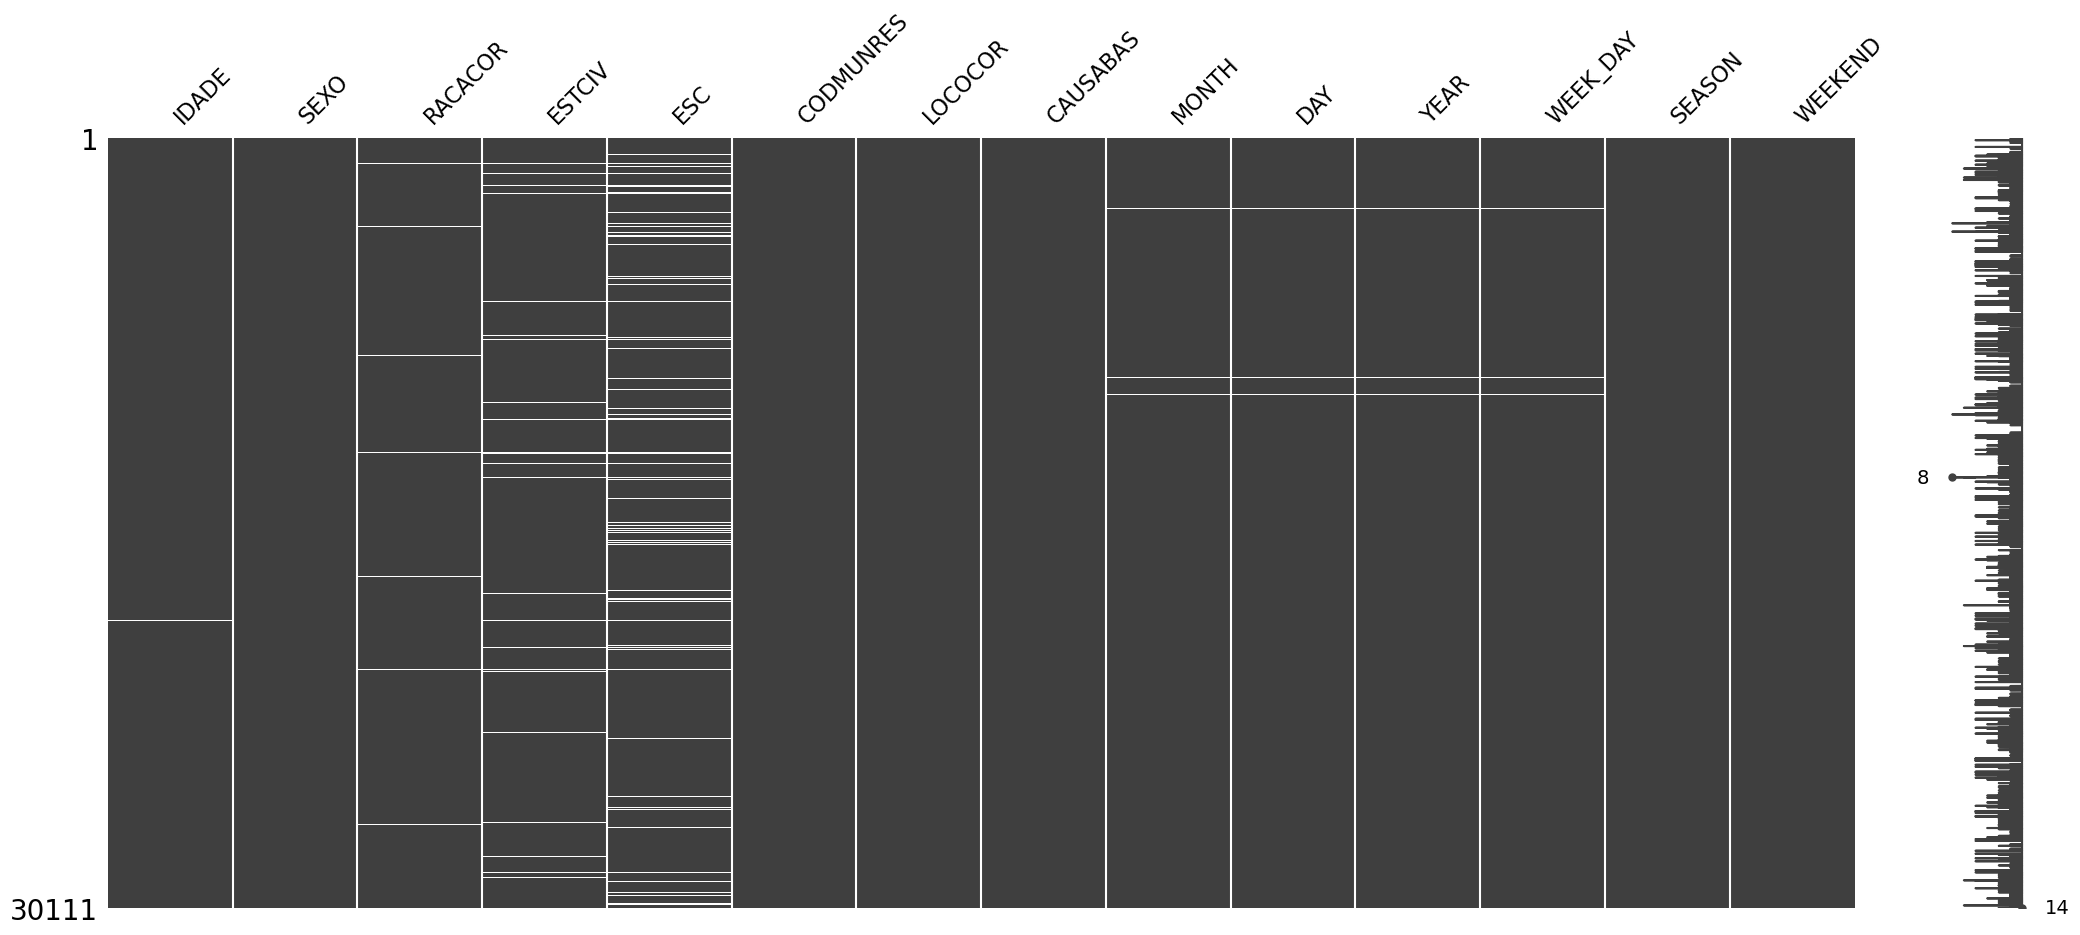

In [ ]:
msno.matrix(sul);

Removing the entries with missing values regarding age and the date, that is later used to align with CNES dataset.  
Changing missing values in other calumns to 'ignored'.  
Categorizing age in decade.

In [ ]:
sul = sul.dropna(subset= ['IDADE', 'MONTH'])

In [ ]:
cols = ['RACACOR', 'ESTCIV', 'ESC']
sul[cols] = sul[cols].replace((np.nan, 9), 0)

In [ ]:
sul['Idade'] = pd.cut(sul['IDADE'], labels=False, bins=[9, 19, 29, 39, 49, 59, 69, 79, 89, 109])
sul

,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CAUSABAS,MONTH,DAY,YEAR,WEEK_DAY,SEASON,WEEKEND,Idade
2,26.0,1,1.0,1.0,5.0,410040,3,X700,1.0,12.0,2009.0,Monday,summer,0,1
3,27.0,1,1.0,1.0,4.0,410040,3,X700,5.0,19.0,2009.0,Tuesday,autumn,0,1
4,14.0,2,1.0,1.0,4.0,410040,1,X689,8.0,20.0,2009.0,Thursday,winter,0,0
5,27.0,1,1.0,1.0,3.0,410040,1,X699,3.0,7.0,2009.0,Saturday,summer,1,1
6,43.0,1,1.0,1.0,3.0,410040,5,X709,6.0,17.0,2009.0,Wednesday,autumn,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30106,56.0,1,1.0,1.0,0.0,432230,3,X700,12.0,30.0,2020.0,Wednesday,summer,0,4
30107,58.0,2,1.0,2.0,0.0,432090,3,X700,12.0,30.0,2020.0,Wednesday,summer,0,4
30108,44.0,1,1.0,1.0,0.0,430430,3,X700,12.0,31.0,2020.0,Thursday,summer,0,3
30109,46.0,1,2.0,2.0,3.0,431490,5,X709,12.0,31.0,2020.0,Thursday,summer,0,3


In [ ]:
sul.to_csv('SUL_SIM_limpo.csv', index= False)

Separating the categories of the different columns.  
Creating a counting to each death to group the entries by city and date (year and month).

In [ ]:
df = sul
sul = pd.get_dummies(sul, columns=['SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'LOCOCOR', 'Idade', 'SEASON']).drop(['WEEK_DAY', 'DAY', 'IDADE', 'CAUSABAS'], axis= 1)

In [ ]:
sul['CONTADOR'] = 1
sul

,CODMUNRES,MONTH,YEAR,WEEKEND,SEXO_1,SEXO_2,RACACOR_0.0,RACACOR_1.0,RACACOR_2.0,RACACOR_3.0,RACACOR_4.0,RACACOR_5.0,ESTCIV_0.0,ESTCIV_1.0,ESTCIV_2.0,ESTCIV_3.0,ESTCIV_4.0,ESTCIV_5.0,ESC_0.0,ESC_1.0,ESC_2.0,ESC_3.0,ESC_4.0,ESC_5.0,LOCOCOR_1,LOCOCOR_2,LOCOCOR_3,LOCOCOR_4,LOCOCOR_5,LOCOCOR_9,Idade_0,Idade_1,Idade_2,Idade_3,Idade_4,Idade_5,Idade_6,Idade_7,Idade_8,SEASON_autumn,SEASON_spring,SEASON_summer,SEASON_winter,CONTADOR
2,410040,1.0,2009.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,410040,5.0,2009.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,410040,8.0,2009.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
5,410040,3.0,2009.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
6,410040,6.0,2009.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30106,432230,12.0,2020.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
30107,432090,12.0,2020.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
30108,430430,12.0,2020.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
30109,431490,12.0,2020.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [ ]:
colunas = ['WEEKEND', 'SEXO_1', 'SEXO_2', 'RACACOR_0.0', 'RACACOR_1.0', 'RACACOR_2.0', 'RACACOR_3.0', 'RACACOR_4.0', 'RACACOR_5.0', 'ESTCIV_0.0', 'ESTCIV_1.0', 'ESTCIV_2.0',
           'ESTCIV_3.0', 'ESTCIV_4.0', 'ESTCIV_5.0', 'ESC_0.0', 'ESC_1.0', 'ESC_2.0', 'ESC_3.0', 'ESC_4.0', 'ESC_5.0', 'LOCOCOR_1', 'LOCOCOR_2', 'LOCOCOR_3', 'LOCOCOR_4', 
           'LOCOCOR_5', 'LOCOCOR_9', 'Idade_0', 'Idade_1', 'Idade_2', 'Idade_3', 'Idade_4', 'Idade_5', 'Idade_6', 'Idade_7', 'Idade_8', 'SEASON_autumn', 'SEASON_spring',
           'SEASON_summer', 'SEASON_winter', 'CONTADOR']

sul= sul.groupby(['CODMUNRES', 'YEAR', 'MONTH'], as_index= False)[colunas].sum()
sul

,CODMUNRES,YEAR,MONTH,WEEKEND,SEXO_1,SEXO_2,RACACOR_0.0,RACACOR_1.0,RACACOR_2.0,RACACOR_3.0,RACACOR_4.0,RACACOR_5.0,ESTCIV_0.0,ESTCIV_1.0,ESTCIV_2.0,ESTCIV_3.0,ESTCIV_4.0,ESTCIV_5.0,ESC_0.0,ESC_1.0,ESC_2.0,ESC_3.0,ESC_4.0,ESC_5.0,LOCOCOR_1,LOCOCOR_2,LOCOCOR_3,LOCOCOR_4,LOCOCOR_5,LOCOCOR_9,Idade_0,Idade_1,Idade_2,Idade_3,Idade_4,Idade_5,Idade_6,Idade_7,Idade_8,SEASON_autumn,SEASON_spring,SEASON_summer,SEASON_winter,CONTADOR
0,410000,2012.0,9.0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,410000,2018.0,6.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,410000,2020.0,8.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
3,410000,2020.0,11.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,410010,2010.0,12.0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21260,432380,2019.0,3.0,0,2,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,2
21261,432380,2019.0,12.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
21262,432380,2020.0,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
21263,432380,2020.0,3.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


Merging SIM and CNES datasets.

In [ ]:
cnes = pd.read_csv('CNES_final.csv')
cnes

,CODUFMUN,COMPETEN,PROF_SUS,CONSELHO_10.0,CONSELHO_12.0,CONSELHO_15.0,CONSELHO_17.0,CONSELHO_18.0,CONSELHO_19.0,CONSELHO_20.0,CONSELHO_22.0,CONSELHO_23.0,CONSELHO_24.0,CONSELHO_25.0,CONSELHO_26.0,CONSELHO_40.0,CONSELHO_41.0,CONSELHO_42.0,CONSELHO_44.0,CONSELHO_60.0,CONSELHO_61.0,CONSELHO_62.0,CONSELHO_63.0,CONSELHO_64.0,CONSELHO_65.0,CONSELHO_66.0,CONSELHO_67.0,CONSELHO_68.0,CONSELHO_69.0,CONSELHO_70.0,CONSELHO_71.0,CONSELHO_72.0,CONSELHO_73.0,CONSELHO_74.0,CONSELHO_75.0,CONSELHO_76.0,CONSELHO_77.0,CONSELHO_78.0,CONSELHO_79.0,CONSELHO_80.0,CONSELHO_81.0,CONSELHO_82.0,CONSELHO_83.0,CONSELHO_99.0,CONSELHO_0.0,CONSELHO_43.0,TP_UNID_1.0,TP_UNID_2.0,TP_UNID_4.0,TP_UNID_5.0,TP_UNID_7.0,TP_UNID_15.0,TP_UNID_20.0,TP_UNID_21.0,TP_UNID_22.0,TP_UNID_36.0,TP_UNID_39.0,TP_UNID_40.0,TP_UNID_42.0,TP_UNID_43.0,TP_UNID_50.0,TP_UNID_60.0,TP_UNID_61.0,TP_UNID_62.0,TP_UNID_64.0,TP_UNID_67.0,TP_UNID_68.0,TP_UNID_69.0,TP_UNID_70.0,TP_UNID_71.0,TP_UNID_72.0,TP_UNID_73.0,TP_UNID_74.0,TP_UNID_76.0,TP_UNID_77.0,TP_UNID_80.0,TP_UNID_82.0,TP_UNID_83.0,TP_UNID_84.0,SERV_ESP_115.0,HAB_MENTAL,SGRUPHAB_5001.0,SGRUPHAB_6001.0,SUS,SERV_ESP_115.0.1
0,410010,200901.0,41.0,12.0,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,177.0,0.0,0.0,23.0,2.0,57.0,12.0,0.0,0.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,41.0,0.0
1,410010,200902.0,41.0,12.0,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,177.0,0.0,0.0,23.0,2.0,57.0,12.0,0.0,0.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,41.0,0.0
2,410010,200903.0,42.0,12.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,178.0,0.0,0.0,23.0,4.0,58.0,12.0,0.0,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,42.0,0.0
3,410010,200904.0,42.0,12.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,178.0,0.0,0.0,23.0,4.0,74.0,12.0,0.0,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,42.0,0.0
4,410010,200905.0,42.0,12.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,178.0,0.0,0.0,23.0,4.0,74.0,12.0,0.0,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199876,432380,202208.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,72.0,0.0,0.0,11.0,11.0,49.0,0.0,0.0,5.0,29.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
199877,432380,202209.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,72.0,0.0,0.0,11.0,11.0,49.0,0.0,0.0,5.0,29.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0

In [ ]:
def month(row):
    if row['MONTH'] >= 10:
        return row['MONTH'].astype(str)
    else:
        return "0" + row['MONTH'].astype(str)

sul['MONTH'] = sul.apply(lambda row: month(row), axis= 1)
sul['YEAR'] = sul['YEAR'].astype(int)
sul['YEAR'] = sul['YEAR'].astype(str)
sul['COMPETEN'] = sul['YEAR'] + "" + sul['MONTH']
sul['COMPETEN'] = sul['COMPETEN'].astype(float)
sul = sul.drop(['YEAR', 'MONTH'], axis= 1).rename({'CODMUNRES':'CODUFMUN'}, axis= 1)

In [ ]:
sul = sul.rename({'SEXO_1':'SEXO_M', 'SEXO_2':'SEXO_F', 'RACACOR_0.0':'RACACOR_IGN', 'RACACOR_1.0':'RACACOR_BRA', 'RACACOR_2.0':'RACACOR_PRE', 'RACACOR_3.0':'RACACOR_AMA',
                   'RACACOR_4.0':'RACACOR_PAR', 'RACACOR_5.0':'RACACOR_IND', 'ESTCIV_0.0':'ESTCIV_IGN', 'ESTCIV_1.0':'ESTCIV_SOL', 'ESTCIV_2.0':'ESTCIV_CAS',
                   'ESTCIV_3.0':'ESTCIV_VIU', 'ESTCIV_4.0':'ESTCIV_SEP', 'ESTCIV_5.0':'ESTCIV_UNI', 'ESC_0.0':'ESC_IGN', 'ESC_1.0':'ESC_NONE', 'ESC_2.0':'ESC_3ANOS',
                   'ESC_3.0':'ESC_7ANOS', 'ESC_4.0':'ESC_11ANOS', 'ESC_5.0':'ESC_12MAIS', 'LOCOCOR_1':'LOCAL_HOSP', 'LOCOCOR_2':'LOCAL_OUTSAU', 'LOCOCOR_3':'LOCAL_CASA',
                   'LOCOCOR_4':'LOCAL_VIA', 'LOCOCOR_5':'LOCAL_OUTRO', 'LOCOCOR_9':'LOCAL_IGN', 'Idade_0':'IDADE_10', 'Idade_1':'IDADE_20', 'Idade_2':'IDADE_30',
                   'Idade_3':'IDADE_40', 'Idade_4':'IDADE_50', 'Idade_5':'IDADE_60', 'Idade_6':'IDADE_70', 'Idade_7':'IDADE_80', 'Idade_8':'IDADE_90+'
                   }, axis=1)


In [ ]:
sul = pd.merge(sul, cnes, on= ['CODUFMUN', 'COMPETEN'], how= 'left')
sul

,CODUFMUN,WEEKEND,SEXO_M,SEXO_F,RACACOR_IGN,RACACOR_BRA,RACACOR_PRE,RACACOR_AMA,RACACOR_PAR,RACACOR_IND,ESTCIV_IGN,ESTCIV_SOL,ESTCIV_CAS,ESTCIV_VIU,ESTCIV_SEP,ESTCIV_UNI,ESC_IGN,ESC_NONE,ESC_3ANOS,ESC_7ANOS,ESC_11ANOS,ESC_12MAIS,LOCAL_HOSP,LOCAL_OUTSAU,LOCAL_CASA,LOCAL_VIA,LOCAL_OUTRO,LOCAL_IGN,IDADE_10,IDADE_20,IDADE_30,IDADE_40,IDADE_50,IDADE_60,IDADE_70,IDADE_80,IDADE_90+,SEASON_autumn,SEASON_spring,SEASON_summer,SEASON_winter,CONTADOR,COMPETEN,PROF_SUS,CONSELHO_10.0,CONSELHO_12.0,CONSELHO_15.0,CONSELHO_17.0,CONSELHO_18.0,CONSELHO_19.0,CONSELHO_20.0,CONSELHO_22.0,CONSELHO_23.0,CONSELHO_24.0,CONSELHO_25.0,CONSELHO_26.0,CONSELHO_40.0,CONSELHO_41.0,CONSELHO_42.0,CONSELHO_44.0,CONSELHO_60.0,CONSELHO_61.0,CONSELHO_62.0,CONSELHO_63.0,CONSELHO_64.0,CONSELHO_65.0,CONSELHO_66.0,CONSELHO_67.0,CONSELHO_68.0,CONSELHO_69.0,CONSELHO_70.0,CONSELHO_71.0,CONSELHO_72.0,CONSELHO_73.0,CONSELHO_74.0,CONSELHO_75.0,CONSELHO_76.0,CONSELHO_77.0,CONSELHO_78.0,CONSELHO_79.0,CONSELHO_80.0,CONSELHO_81.0,CONSELHO_82.0,CONSELHO_83.0,CONSELHO_99.0,CONSELHO_0.0,CONSELHO_43.0,TP_UNID_1.0,TP_UNID_2.0,TP_UNID_4.0,TP_UNID_5.0,TP_UNID_7.0,TP_UNID_15.0,TP_UNID_20.0,TP_UNID_21.0,TP_UNID_22.0,TP_UNID_36.0,TP_UNID_39.0,TP_UNID_40.0,TP_UNID_42.0,TP_UNID_43.0,TP_UNID_50.0,TP_UNID_60.0,TP_UNID_61.0,TP_UNID_62.0,TP_UNID_64.0,TP_UNID_67.0,TP_UNID_68.0,TP_UNID_69.0,TP_UNID_70.0,TP_UNID_71.0,TP_UNID_72.0,TP_UNID_73.0,TP_UNID_74.0,TP_UNID_76.0,TP_UNID_77.0,TP_UNID_80.0,TP_UNID_82.0,TP_UNID_83.0,TP_UNID_84.0,SERV_ESP_115.0,HAB_MENTAL,SGRUPHAB_5001.0,SGRUPHAB_6001.0,SUS,SERV_ESP_115.0.1
0,410000,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,201209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410000,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,201806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,410000,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,202008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,410000,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,202011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,410010,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,201012.0,39.0,12.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,158.0,0.0,0.0,23.0,4.0,86.0,12.0,0.0,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
sul = sul.dropna()

The cities codes from DATASUS is different from the codes from IBGE, that has some information about the city, as estimated population and demografic density.

In [ ]:
cod = pd.read_csv('Cod_mun.csv')
cod

,CD_MUN,MUN,POP_EST,DENS_DEM,CODUFMUN
0,4100103,ABATIA,7360,33.95,410010
1,4200051,ABDON BATISTA,2534,11.25,420005
2,4200101,ABELARDO LUZ,18015,17.94,420010
3,4300034,ACEGUA,4981,2.84,430003
4,4100202,ADRIANOPOLIS,5797,4.73,410020
...,...,...,...,...,...
1186,4323804,XANGRI-LA,17126,204.88,432380
1187,4219507,XANXERE,52290,116.81,421950
1188,4219606,XAVANTINA,3873,19.12,421960
1189,4219705,XAXIM,29254,87.67,421970


In [ ]:
sul = pd.merge(sul, cod, on='CODUFMUN', how='left')
sul = sul.drop(['CD_MUN', 'MUN'], axis= 1)
sul

,CODUFMUN,WEEKEND,SEXO_M,SEXO_F,RACACOR_IGN,RACACOR_BRA,RACACOR_PRE,RACACOR_AMA,RACACOR_PAR,RACACOR_IND,ESTCIV_IGN,ESTCIV_SOL,ESTCIV_CAS,ESTCIV_VIU,ESTCIV_SEP,ESTCIV_UNI,ESC_IGN,ESC_NONE,ESC_3ANOS,ESC_7ANOS,ESC_11ANOS,ESC_12MAIS,LOCAL_HOSP,LOCAL_OUTSAU,LOCAL_CASA,LOCAL_VIA,LOCAL_OUTRO,LOCAL_IGN,IDADE_10,IDADE_20,IDADE_30,IDADE_40,IDADE_50,IDADE_60,IDADE_70,IDADE_80,IDADE_90+,SEASON_autumn,SEASON_spring,SEASON_summer,SEASON_winter,CONTADOR,COMPETEN,PROF_SUS,CONSELHO_10.0,CONSELHO_12.0,CONSELHO_15.0,CONSELHO_17.0,CONSELHO_18.0,CONSELHO_19.0,CONSELHO_20.0,CONSELHO_22.0,CONSELHO_23.0,CONSELHO_24.0,CONSELHO_25.0,CONSELHO_26.0,CONSELHO_40.0,CONSELHO_41.0,CONSELHO_42.0,CONSELHO_44.0,CONSELHO_60.0,CONSELHO_61.0,CONSELHO_62.0,CONSELHO_63.0,CONSELHO_64.0,CONSELHO_65.0,CONSELHO_66.0,CONSELHO_67.0,CONSELHO_68.0,CONSELHO_69.0,CONSELHO_70.0,CONSELHO_71.0,CONSELHO_72.0,CONSELHO_73.0,CONSELHO_74.0,CONSELHO_75.0,CONSELHO_76.0,CONSELHO_77.0,CONSELHO_78.0,CONSELHO_79.0,CONSELHO_80.0,CONSELHO_81.0,CONSELHO_82.0,CONSELHO_83.0,CONSELHO_99.0,CONSELHO_0.0,CONSELHO_43.0,TP_UNID_1.0,TP_UNID_2.0,TP_UNID_4.0,TP_UNID_5.0,TP_UNID_7.0,TP_UNID_15.0,TP_UNID_20.0,TP_UNID_21.0,TP_UNID_22.0,TP_UNID_36.0,TP_UNID_39.0,TP_UNID_40.0,TP_UNID_42.0,TP_UNID_43.0,TP_UNID_50.0,TP_UNID_60.0,TP_UNID_61.0,TP_UNID_62.0,TP_UNID_64.0,TP_UNID_67.0,TP_UNID_68.0,TP_UNID_69.0,TP_UNID_70.0,TP_UNID_71.0,TP_UNID_72.0,TP_UNID_73.0,TP_UNID_74.0,TP_UNID_76.0,TP_UNID_77.0,TP_UNID_80.0,TP_UNID_82.0,TP_UNID_83.0,TP_UNID_84.0,SERV_ESP_115.0,HAB_MENTAL,SGRUPHAB_5001.0,SGRUPHAB_6001.0,SUS,SERV_ESP_115.0.1,POP_EST,DENS_DEM
0,410010,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,201012.0,39.0,12.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,158.0,0.0,0.0,23.0,4.0,86.0,12.0,0.0,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,7360,33.95
1,410010,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,201207.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,0.0,0.0,3.0,2.0,10.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95
2,410010,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,201307.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,0.0,3.0,2.0,9.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95
3,410010,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,201404.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0,0.0,0.0,3.0,2.0,9.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95
4,410010,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,201506.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.0,0.0,0.0,3.0,2.0,7.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Creating a column with the suicide rate of the city in a given year and month by 100,000 inhabitants.

In [ ]:
sul['TAXA_SUIC'] = sul['CONTADOR'] / sul['POP_EST'] * 100000
sul

,CODUFMUN,WEEKEND,SEXO_M,SEXO_F,RACACOR_IGN,RACACOR_BRA,RACACOR_PRE,RACACOR_AMA,RACACOR_PAR,RACACOR_IND,ESTCIV_IGN,ESTCIV_SOL,ESTCIV_CAS,ESTCIV_VIU,ESTCIV_SEP,ESTCIV_UNI,ESC_IGN,ESC_NONE,ESC_3ANOS,ESC_7ANOS,ESC_11ANOS,ESC_12MAIS,LOCAL_HOSP,LOCAL_OUTSAU,LOCAL_CASA,LOCAL_VIA,LOCAL_OUTRO,LOCAL_IGN,IDADE_10,IDADE_20,IDADE_30,IDADE_40,IDADE_50,IDADE_60,IDADE_70,IDADE_80,IDADE_90+,SEASON_autumn,SEASON_spring,SEASON_summer,SEASON_winter,CONTADOR,COMPETEN,PROF_SUS,CONSELHO_10.0,CONSELHO_12.0,CONSELHO_15.0,CONSELHO_17.0,CONSELHO_18.0,CONSELHO_19.0,CONSELHO_20.0,CONSELHO_22.0,CONSELHO_23.0,CONSELHO_24.0,CONSELHO_25.0,CONSELHO_26.0,CONSELHO_40.0,CONSELHO_41.0,CONSELHO_42.0,CONSELHO_44.0,CONSELHO_60.0,CONSELHO_61.0,CONSELHO_62.0,CONSELHO_63.0,CONSELHO_64.0,CONSELHO_65.0,CONSELHO_66.0,CONSELHO_67.0,CONSELHO_68.0,CONSELHO_69.0,CONSELHO_70.0,CONSELHO_71.0,CONSELHO_72.0,CONSELHO_73.0,CONSELHO_74.0,CONSELHO_75.0,CONSELHO_76.0,CONSELHO_77.0,CONSELHO_78.0,CONSELHO_79.0,CONSELHO_80.0,CONSELHO_81.0,CONSELHO_82.0,CONSELHO_83.0,CONSELHO_99.0,CONSELHO_0.0,CONSELHO_43.0,TP_UNID_1.0,TP_UNID_2.0,TP_UNID_4.0,TP_UNID_5.0,TP_UNID_7.0,TP_UNID_15.0,TP_UNID_20.0,TP_UNID_21.0,TP_UNID_22.0,TP_UNID_36.0,TP_UNID_39.0,TP_UNID_40.0,TP_UNID_42.0,TP_UNID_43.0,TP_UNID_50.0,TP_UNID_60.0,TP_UNID_61.0,TP_UNID_62.0,TP_UNID_64.0,TP_UNID_67.0,TP_UNID_68.0,TP_UNID_69.0,TP_UNID_70.0,TP_UNID_71.0,TP_UNID_72.0,TP_UNID_73.0,TP_UNID_74.0,TP_UNID_76.0,TP_UNID_77.0,TP_UNID_80.0,TP_UNID_82.0,TP_UNID_83.0,TP_UNID_84.0,SERV_ESP_115.0,HAB_MENTAL,SGRUPHAB_5001.0,SGRUPHAB_6001.0,SUS,SERV_ESP_115.0.1,POP_EST,DENS_DEM,TAXA_SUIC
0,410010,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,201012.0,39.0,12.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,158.0,0.0,0.0,23.0,4.0,86.0,12.0,0.0,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,7360,33.95,13.586957
1,410010,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,201207.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,0.0,0.0,3.0,2.0,10.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95,13.586957
2,410010,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,201307.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,0.0,3.0,2.0,9.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95,13.586957
3,410010,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,201404.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0,0.0,0.0,3.0,2.0,9.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95,13.586957
4,410010,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,201506.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.0,0.0,0.0,3.0,2.0,7.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95,13.586957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
sul['TAXA_SUIC'].describe()

count    21259.000000
mean         7.953931
std         11.096264
min          0.050924
25%          1.379444
50%          3.659652
75%          9.407338
max        139.860140
Name: TAXA_SUIC, dtype: float64

In [ ]:
def taxa(x):
    if x['TAXA_SUIC'] <= 5:
        return 'LOW'
    elif x['TAXA_SUIC'] <= 10:
        return 'MODERATE'
    elif x['TAXA_SUIC'] > 10:
        return 'HIGH'

sul['TAXA_SUICIDIO'] = sul.apply(lambda x: taxa(x), axis= 1)

In [ ]:
sul

,CODUFMUN,WEEKEND,SEXO_M,SEXO_F,RACACOR_IGN,RACACOR_BRA,RACACOR_PRE,RACACOR_AMA,RACACOR_PAR,RACACOR_IND,ESTCIV_IGN,ESTCIV_SOL,ESTCIV_CAS,ESTCIV_VIU,ESTCIV_SEP,ESTCIV_UNI,ESC_IGN,ESC_NONE,ESC_3ANOS,ESC_7ANOS,ESC_11ANOS,ESC_12MAIS,LOCAL_HOSP,LOCAL_OUTSAU,LOCAL_CASA,LOCAL_VIA,LOCAL_OUTRO,LOCAL_IGN,IDADE_10,IDADE_20,IDADE_30,IDADE_40,IDADE_50,IDADE_60,IDADE_70,IDADE_80,IDADE_90+,SEASON_autumn,SEASON_spring,SEASON_summer,SEASON_winter,CONTADOR,COMPETEN,PROF_SUS,CONSELHO_10.0,CONSELHO_12.0,CONSELHO_15.0,CONSELHO_17.0,CONSELHO_18.0,CONSELHO_19.0,CONSELHO_20.0,CONSELHO_22.0,CONSELHO_23.0,CONSELHO_24.0,CONSELHO_25.0,CONSELHO_26.0,CONSELHO_40.0,CONSELHO_41.0,CONSELHO_42.0,CONSELHO_44.0,CONSELHO_60.0,CONSELHO_61.0,CONSELHO_62.0,CONSELHO_63.0,CONSELHO_64.0,CONSELHO_65.0,CONSELHO_66.0,CONSELHO_67.0,CONSELHO_68.0,CONSELHO_69.0,CONSELHO_70.0,CONSELHO_71.0,CONSELHO_72.0,CONSELHO_73.0,CONSELHO_74.0,CONSELHO_75.0,CONSELHO_76.0,CONSELHO_77.0,CONSELHO_78.0,CONSELHO_79.0,CONSELHO_80.0,CONSELHO_81.0,CONSELHO_82.0,CONSELHO_83.0,CONSELHO_99.0,CONSELHO_0.0,CONSELHO_43.0,TP_UNID_1.0,TP_UNID_2.0,TP_UNID_4.0,TP_UNID_5.0,TP_UNID_7.0,TP_UNID_15.0,TP_UNID_20.0,TP_UNID_21.0,TP_UNID_22.0,TP_UNID_36.0,TP_UNID_39.0,TP_UNID_40.0,TP_UNID_42.0,TP_UNID_43.0,TP_UNID_50.0,TP_UNID_60.0,TP_UNID_61.0,TP_UNID_62.0,TP_UNID_64.0,TP_UNID_67.0,TP_UNID_68.0,TP_UNID_69.0,TP_UNID_70.0,TP_UNID_71.0,TP_UNID_72.0,TP_UNID_73.0,TP_UNID_74.0,TP_UNID_76.0,TP_UNID_77.0,TP_UNID_80.0,TP_UNID_82.0,TP_UNID_83.0,TP_UNID_84.0,SERV_ESP_115.0,HAB_MENTAL,SGRUPHAB_5001.0,SGRUPHAB_6001.0,SUS,SERV_ESP_115.0.1,POP_EST,DENS_DEM,TAXA_SUIC,TAXA_SUICIDIO
0,410010,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,201012.0,39.0,12.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,158.0,0.0,0.0,23.0,4.0,86.0,12.0,0.0,0.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,7360,33.95,13.586957,HIGH
1,410010,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,201207.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,0.0,0.0,3.0,2.0,10.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95,13.586957,HIGH
2,410010,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,201307.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,0.0,3.0,2.0,9.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95,13.586957,HIGH
3,410010,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,201404.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0,0.0,0.0,3.0,2.0,9.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95,13.586957,HIGH
4,410010,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,201506.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.0,0.0,0.0,3.0,2.0,7.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7360,33.95,13.586957,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

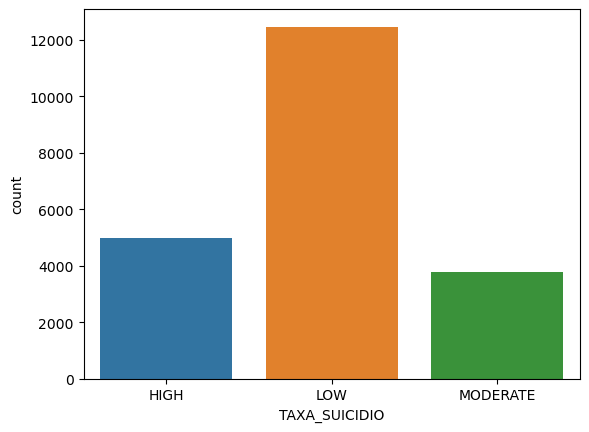

In [ ]:
sns.countplot(data= sul, x= 'TAXA_SUICIDIO');

In [ ]:
sul.to_csv('SUL_SIM_ML.csv', index= False)

In [ ]:
print(len(sul[sul['TAXA_SUICIDIO'] == 'LOW']))
print(len(sul[sul['TAXA_SUICIDIO'] == 'MODERATE']))
print(len(sul[sul['TAXA_SUICIDIO'] == 'HIGH']))

12472
3799
4988


## SINAN

In [ ]:
sul_les = pd.read_csv('SUL_LOOP.csv')
sul_les

/tmp/ipykernel_8133/1681046575.py:1: DtypeWarning: Columns (3,4,10,11,12,14,16,20,21,22,37,38,40,44,45,46,47,48,49,50,51,52,53,65,66,68,69,70,75,76,77,78,79,112,113,134,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,163,164,165,166,168,169) have mixed types. Specify dtype option on import or set low_memory=False.
  sul_les = pd.read_csv('SUL_LOOP.csv')


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,TP_UNI_EXT,NM_UNI_EXT,CO_UNI_EXT,...,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,IDENT_MICR
0,2,Y09,20090524,,,41,410420,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Y09,20090508,,,41,411530,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Y09,20091218,,,41,412710,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Y09,20091218,,,41,412710,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Y09,20091104,,,41,410230,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160198,2,Y09,20210818,202133,2021,43,431560,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160199,2,Y09,20210818,202133,2021,43,431560,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160200,2,Y09,20210818,202133,2021,43,430060,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160201,2,Y09,20210818,202133,2021,43,432050,,...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The form for a suicide attempt is the same for other types of violence (sexual, interpessoal, work-related), thus we removed all the variables not relevant for self-inflicted violence.

In [ ]:
sul_les = sul_les.drop(labels= ['SG_UF', 'ID_PAIS', 'NDUPLIC', 'DT_INVEST', 'SG_UF_OCOR', 'VIOL_FISIC', 'VIOL_PSICO', 'VIOL_TORT',
                      'VIOL_SEXU', 'VIOL_TRAF', 'VIOL_FINAN', 'VIOL_NEGLI', 'VIOL_INFAN', 'VIOL_LEGAL',
                      'SEX_ASSEDI', 'SEX_ESTUPR', 'SEX_PUDOR', 'SEX_PORNO', 'SEX_EXPLO', 'SEX_OUTRO', 'SEX_ESPEC',
                      'PEN_ORAL', 'PEN_ANAL', 'PEN_VAGINA', 'PROC_DST', 'PROC_HIV',  'PROC_HEPB', 'PROC_SANG', 'PROC_SEMEN',
                      'PROC_VAGIN', 'PROC_CONTR', 'PROC_ABORT', 'CONS_ABORT', 'CONS_GRAV', 'CONS_DST', 'CONS_SUIC',
                      'CONS_MENT', 'CONS_COMP', 'CONS_ESTRE', 'CONS_OUTR', 'CONS_ESPEC', 'LESAO_NAT', 'LESAO_ESPE',
                      'LESAO_CORP', 'REL_SEXUAL', 'AUTOR_SEXO', 'ENC_SAUDE', 'ENC_TUTELA', 'ENC_VARA', 'ENC_ABRIGO',
                      'ENC_SENTIN', 'ENC_DEAM', 'ENC_DPCA', 'ENC_DELEG', 'ENC_MPU', 'ENC_CREAS', 'ENC_IML', 'ENC_OUTR',
                      'ENC_ESPEC', 'REL_TRAB', 'REL_CAT', 'CLASSI_FIN', 'EVOLUCAO', 'TPUNINOT', 'CICL_VID', 'ASSIST_SOC',
                      'REDE_EDUCA', 'ATEND_MULH', 'CONS_TUTEL', 'CONS_IDO', 'DELEG_IDOS', 'DIR_HUMAN', 'MPU', 'DELEG_CRIA',
                      'DELEG_MULH', 'DELEG', 'INFAN_JUV', 'DEFEN_PUBL', 'ZONA', 'ZONA_OCOR', 'DT_DIGITA', 'DT_TRANSUS',
                      'DT_TRANSDM', 'DT_TRANSSM', 'DT_TRANSRM', 'DT_TRANSRS', 'DT_TRANSSE', 'NU_LOTE_V', 'NU_LOTE_H',
                      'NM_UNI_EXT', 'CO_UNI_EXT', 'ENC_MULHER', 'DT_OBITO', 'TP_UNI_EXT', 'IDENT_MICR', 'HORA_OCOR', 'SEM_PRI',
                      'REL_ESPEC', 'REL_PAI', 'REL_MAE', 'REL_CONJ', 'REL_NAMO', 'REL_PAD', 'REL_MAD', 'REL_EXCON', 'REL_EXNAM',
                      'REL_FILHO', 'REL_DESCO', 'REL_IRMAO', 'REL_CONHEC', 'REL_CUIDA', 'REL_PATRAO', 'REL_INST', 'REL_POL',
                      'REL_PROPRI', 'REL_OUTROS', 'IDENT_GEN', 'DEF_ESPEC', 'LOCAL_ESPE'
                               ],
             axis= 1)

In [ ]:
sul_les

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,ID_REGIONA,ID_RG_RESI,...,AG_AMEACA,AG_OUTROS,AG_ESPEC,NUM_ENVOLV,AUTOR_ALCO,CIRC_LESAO,ORIENT_SEX,VIOL_MOTIV,REDE_SAU,DT_ENCERRA
0,2,Y09,20090524,,,41,410420,13854,1356,1356,...,2,2,,9,9,,,,,20090602
1,2,Y09,20090508,,,41,411530,2738147,1361,1361,...,2,2,,1,1,,,,,20090509
2,2,Y09,20091218,,,41,412710,3333507,1375,1375,...,2,1,CHA ABORTIVO,1,2,O07,,,,20091218
3,2,Y09,20091218,,,41,412710,3333507,1375,1375,...,2,1,CHA ABORTIVO,1,2,O07,,,,20091218
4,2,Y09,20091104,,,41,410230,13579,1356,1356,...,2,2,,1,1,,,,,20091112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160198,2,Y09,20210818,202133,2021,43,431560,2232995,1593,1593,...,9,1,TS,9,9,X61,9,9,9,20210825
160199,2,Y09,20210818,202133,2021,43,431560,2232995,1593,1593,...,9,1,INTOXICACAO,9,9,X69,9,9,1,20210826
160200,2,Y09,20210818,202133,2021,43,430060,2232081,1607,1607,...,2,1,INTOXICACAO EXOGENA,1,2,X61,1,8,1,20210818
160201,2,Y09,20210818,202133,2021,43,432050,2246805,1611,1611,...,2,2,,1,9,,2,2,1,20210823


In [ ]:
sul_les.to_csv('SUL_LES_2021.csv', index= False)

In [ ]:
sul_les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160203 entries, 0 to 160202
Data columns (total 51 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   TP_NOT      160203 non-null  int64 
 1   ID_AGRAVO   160203 non-null  object
 2   DT_NOTIFIC  160203 non-null  int64 
 3   SEM_NOT     160203 non-null  object
 4   NU_ANO      160203 non-null  object
 5   SG_UF_NOT   160203 non-null  int64 
 6   ID_MUNICIP  160203 non-null  int64 
 7   ID_UNIDADE  160203 non-null  object
 8   ID_REGIONA  160203 non-null  object
 9   ID_RG_RESI  160203 non-null  object
 10  DT_OCOR     160203 non-null  int64 
 11  DT_NASC     160203 non-null  object
 12  NU_IDADE_N  160203 non-null  object
 13  CS_SEXO     160203 non-null  object
 14  CS_GESTANT  160203 non-null  int64 
 15  CS_RACA     160203 non-null  object
 16  CS_ESCOL_N  160203 non-null  object
 17  ID_MN_RESI  160203 non-null  object
 18  ID_OCUPA_N  160203 non-null  object
 19  SIT_CONJUG  160203 non-

In [ ]:
sul_les.describe()

,TP_NOT,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,DT_OCOR,CS_GESTANT,LES_AUTOP
count,160203.0,1.602030e+05,160203.000000,160203.000000,1.602030e+05,160203.000000,160203.0
mean,2.0,2.017551e+07,41.967785,420803.884721,2.017501e+07,5.577698,1.0
std,0.0,2.648714e+04,0.858261,8637.006013,5.272307e+04,1.102356,0.0
min,2.0,2.009011e+07,41.000000,410010.000000,2.180901e+06,1.000000,1.0
25%,2.0,2.016072e+07,41.000000,411480.000000,2.016062e+07,5.000000,1.0
50%,2.0,2.018091e+07,42.000000,420690.000000,2.018083e+07,5.000000,1.0
75%,2.0,2.019120e+07,43.000000,430860.000000,2.019113e+07,6.000000,1.0
max,2.0,2.021092e+07,43.000000,432380.000000,2.021092e+07,9.000000,1.0


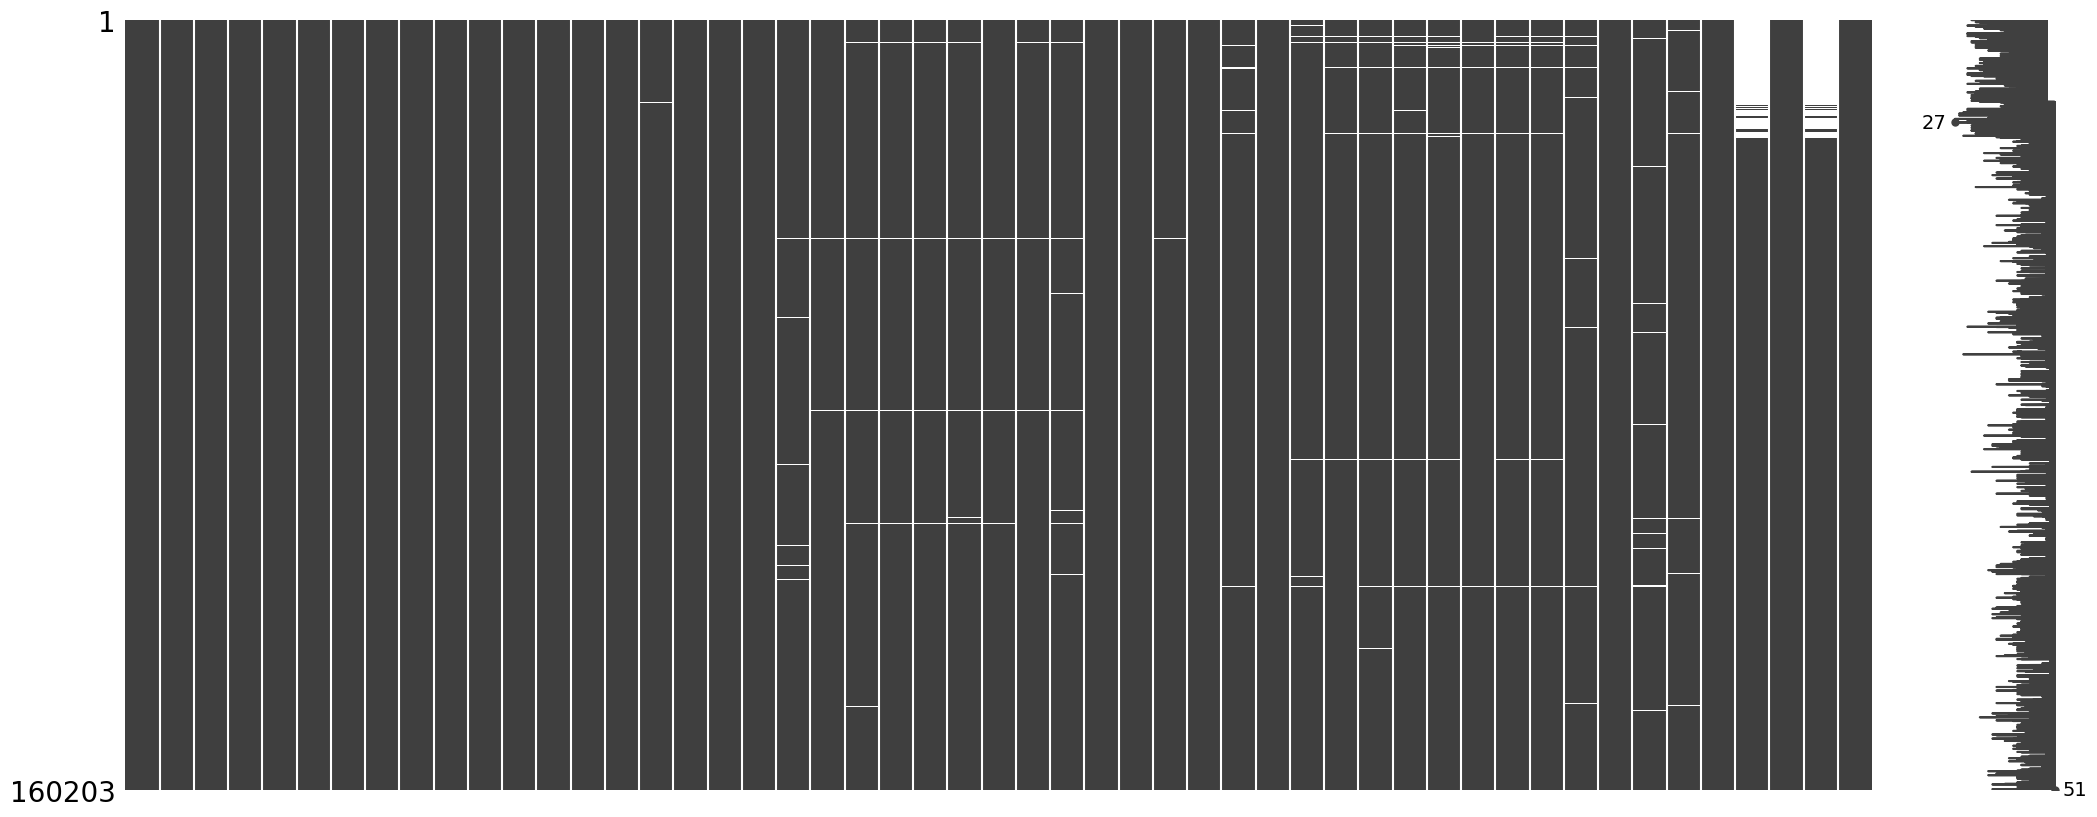

In [ ]:
missingno.matrix(sul_les);

As shown, most variables are 'object' type, and missing values are not always empt but filled with '*', thus we changed the type of the variables to numeric and replace the '*' with and empt value.
We did not chance all the variables to numeric because some especify some data.

In [ ]:
str_columns = sul_les.select_dtypes(['object']).columns
sul_les[str_columns] = sul_les[str_columns].replace('*', np.nan)
sul_les[str_columns] = sul_les[str_columns].replace(' ', np.nan)

In [ ]:
obj_cols = ['ID_AGRAVO', 'SEM_NOT', 'NU_ANO', 'ID_UNIDADE', 'ID_REGIONA', 'NU_IDADE_N',
       'ID_RG_RESI', 'DT_NASC', 'CS_RACA', 'CS_ESCOL_N',
       'ID_MN_RESI', 'ID_OCUPA_N', 'SIT_CONJUG', 'DEF_TRANS', 'DEF_FISICA',
       'DEF_MENTAL', 'DEF_VISUAL', 'DEF_AUDITI', 'TRAN_MENT', 'TRAN_COMP',
       'DEF_OUT', 'ID_MN_OCOR', 'LOCAL_OCOR', 'OUT_VEZES', 'VIOL_OUTR',
       'AG_FORCA', 'AG_ENFOR', 'AG_OBJETO', 'AG_CORTE',
       'AG_QUENTE', 'AG_ENVEN', 'AG_FOGO', 'AG_AMEACA', 'AG_OUTROS',
       'NUM_ENVOLV', 'AUTOR_ALCO', 'CIRC_LESAO', 'ORIENT_SEX',
       'VIOL_MOTIV', 'REDE_SAU', 'DT_ENCERRA']
sul_les[obj_cols] = sul_les[obj_cols].apply(pd.to_numeric, errors= 'coerce', downcast = 'signed', axis= 1)

Age in the SINAN form is coded with four numbers. 
Starting with 4 > age in years
Starting with 3 > age in months
Starting with 2 > age in days
Starting with 1 > age in hours
We subtracted 4000 of all ages, to get the age in years.

In [ ]:
# A idade pelo sinan é codificada, com 4 numeros começando com 4 para anos completos, 3 para meses completos,
# 2 para dias completos e 1 para horas depois do nascimento, portanto subtraindo 4000 das idades codificadas
# já funciona por agora # depois da para fazer uma def para todos as codificações
sul_les['IDADE'] = sul_les['NU_IDADE_N'] - 4000
sul_les['IDADE']

0         16.0
1         43.0
2         20.0
3         37.0
4         21.0
          ... 
160198    22.0
160199    29.0
160200    36.0
160201    21.0
160202    23.0
Name: IDADE, Length: 160203, dtype: float64

"We considered notifications of violence self-inflicted by adolescents and adults living in Santa Catarina, for which the ‘Other’ option in field 56 of the notification form was duly filled out for the period covered by the study. When this option is filled out this enables the type of self-inflicted violence to be defined, classified as ‘suicide attempt’ (when there is intention to die) or ‘self-mutilation’ (when there is no intention to die). The instruction manual states that when filling out field 54 as ‘1- Yes’ for self-inflicted violence, field 56 should be filled out as ‘1- Yes’ in the ‘Other’ option, specifying whether the self-inflicted violence is self-mutilation or a suicide attempt"

We also filtered the data regarding the especification of the violence with strings for 'suicide attempt' in portuguese and filtered the age for 10 or more, similar to in the SIM dataset.

In [ ]:
sul = sul_les[sul_les['VIOL_OUTR'] == 1]
sul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104633 entries, 0 to 160202
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   TP_NOT      104633 non-null  int64  
 1   ID_AGRAVO   0 non-null       float64
 2   DT_NOTIFIC  104633 non-null  int64  
 3   SEM_NOT     96444 non-null   float64
 4   NU_ANO      96444 non-null   float64
 5   SG_UF_NOT   104633 non-null  int64  
 6   ID_MUNICIP  104633 non-null  int64  
 7   ID_UNIDADE  104578 non-null  float64
 8   ID_REGIONA  81159 non-null   float64
 9   ID_RG_RESI  81142 non-null   float64
 10  DT_OCOR     104633 non-null  int64  
 11  DT_NASC     103617 non-null  float64
 12  NU_IDADE_N  104590 non-null  float64
 13  CS_SEXO     104633 non-null  object 
 14  CS_GESTANT  104633 non-null  int64  
 15  CS_RACA     104432 non-null  float64
 16  CS_ESCOL_N  99898 non-null   float64
 17  ID_MN_RESI  104622 non-null  float64
 18  ID_OCUPA_N  55171 non-null   float64
 19  SI

In [ ]:
sul = sul.dropna(subset= ['VIOL_ESPEC'])
sul = sul[sul['IDADE'] >= 10]
sul = sul[sul['VIOL_ESPEC'].str.contains('suic|ts|t.s|intox|enve|enfor', case= False)]

Changing the dates to datetype and separating the days, months, and years to get the season, day of the week and weekend. Later the year and month will be used to merge the SINAN and CNES datasets.

In [ ]:
def reformat_dates(sul):
    sul[['DT_NOTIFIC','DT_OCOR', 'DT_NASC']] = sul[['DT_NOTIFIC','DT_OCOR', 'DT_NASC']].apply(
        pd.to_datetime(sul['DT_NOTIFIC'], unit='s'))
    return sul
sul[['DT_NOTIFIC','DT_OCOR', 'DT_NASC']] = sul[['DT_NOTIFIC','DT_OCOR', 'DT_NASC']].apply(
    pd.to_datetime, format= "%Y%m%d", errors= 'coerce')

sul['MONTH'] = sul['DT_NOTIFIC'].dt.month
sul['DAY'] = sul['DT_NOTIFIC'].dt.day
sul['YEAR'] = sul['DT_NOTIFIC'].dt.year
sul['WEEK_DAY'] = sul['DT_NOTIFIC'].dt.day_name()

# filling NU_ANO with the YEAR
sul['NU_ANO'] = sul['NU_ANO'].fillna(sul['YEAR'])

In [ ]:
def season(row):
    if row['MONTH'] in [1, 2]:
        return 'summer'
    elif (row['MONTH'] == 12 and row['DAY'] > 21) or (row['MONTH'] == 3 and row['DAY'] <= 21):
        return 'summer'

    elif row['MONTH'] in [4, 5]:
        return 'autumn'
    elif (row['MONTH'] == 3 and row['DAY'] > 21) or (row['MONTH'] == 6 and row['DAY'] <= 21):
        return 'autumn'

    if row['MONTH'] in [7, 8]:
        return 'winter'
    elif (row['MONTH'] == 6 and row['DAY'] > 21) or (row['MONTH'] == 9 and row['DAY'] <= 21):
        return 'winter'

    elif row['MONTH'] in [10, 11]:
        return 'spring'
    elif (row['MONTH'] == 9 and row['DAY'] > 21) or (row['MONTH'] == 12 and row['DAY'] <= 21):
        return 'spring'
    else:
        return 'IGN'

sul['SEASON'] = sul.apply(lambda row: season(row), axis= 1)

def weekend(row):
    if row['WEEK_DAY'] == 'Saturday' or row['WEEK_DAY'] == 'Sunday':
        return 1
    else:
        return 0
# checking if the attempt was in a weekend
sul['WEEKEND'] = sul.apply(lambda row: weekend(row), axis= 1)

In [ ]:
# removing columns with more than 30% of missing data
sul = sul[sul.columns[sul.isnull().mean() < 0.30]]

In [ ]:
sul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87851 entries, 0 to 160202
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TP_NOT      87851 non-null  int64         
 1   DT_NOTIFIC  87851 non-null  datetime64[ns]
 2   SEM_NOT     81611 non-null  float64       
 3   NU_ANO      87851 non-null  float64       
 4   SG_UF_NOT   87851 non-null  int64         
 5   ID_MUNICIP  87851 non-null  int64         
 6   ID_UNIDADE  87823 non-null  float64       
 7   DT_OCOR     87850 non-null  datetime64[ns]
 8   DT_NASC     87031 non-null  datetime64[ns]
 9   NU_IDADE_N  87851 non-null  float64       
 10  CS_SEXO     87851 non-null  object        
 11  CS_GESTANT  87851 non-null  int64         
 12  CS_RACA     87698 non-null  float64       
 13  CS_ESCOL_N  84041 non-null  float64       
 14  ID_MN_RESI  87841 non-null  float64       
 15  SIT_CONJUG  86998 non-null  float64       
 16  DEF_TRANS   87672 non

In [ ]:
sul.to_csv('SUL_2021.csv', index= False)
sul_les.to_csv('SUL_LES1_2021.csv', index= False)